# Import Libraries

In [2]:
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Imputing with mode for categorical data
import statistics

# ANOVA Test - For numerical feature
from sklearn.feature_selection import SelectKBest, f_classif

# Scaling
from sklearn.preprocessing import StandardScaler

# Splitting and testing
from sklearn.model_selection import train_test_split

# Model building and Cross Validation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score
from sklearn.model_selection import cross_val_score, GridSearchCV, RepeatedStratifiedKFold

# Logistic Regression -- Linear model
from sklearn.linear_model import LogisticRegression

# Decision Tree -- Tree based model
from sklearn.tree import DecisionTreeClassifier

# Random Forest Classifier -- Tree based / Ensemble / Bagging model
from sklearn.ensemble import RandomForestClassifier

# XGBoost Classifier -- Tree based / Boosting model
from xgboost import XGBClassifier

# Hyperparameter Tuning
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

# Import Data

In [4]:
# Import data
# Display top 5 rows

df = pd.read_csv("Ds_Data.csv")
df.head()

destination  passanger weather  temperature                 coupon  \
0  No Urgent Place      Alone   Sunny           55        Restaurant(<20)   
1  No Urgent Place  Friend(s)   Sunny           80           Coffee House   
2  No Urgent Place  Friend(s)   Sunny           80  Carry out & Take away   
3  No Urgent Place  Friend(s)   Sunny           80           Coffee House   
4  No Urgent Place  Friend(s)   Sunny           80           Coffee House   

  expiration  gender age      maritalStatus  has_children  ... CoffeeHouse  \
0         1d  Female  21  Unmarried partner             1  ...       never   
1         2h  Female  21  Unmarried partner             1  ...       never   
2         2h  Female  21  Unmarried partner             1  ...       never   
3         2h  Female  21  Unmarried partner             1  ...       never   
4         1d  Female  21  Unmarried partner             1  ...       never   

  CarryAway RestaurantLessThan20 Restaurant20To50 toCoupon_GEQ5min  \
0       NaN                  4~8              1~3                1   
1       NaN                  4~8              1~3                1   
2       NaN                  4~8              1~3                1   
3       NaN                  4~8              1~3                1   
4       NaN                  4~8              1~3                1   

  toCoupon_GEQ15min toCoupon_GEQ25min direction_same direction_opp  \
0                 0                 0              0             1   
1                 0                 0              0             1   
2                 1                 0              0             1   
3                 1                 0              0             1   
4                 1                 0              0             1   

   Accept(Y/N?)  
0             1  
1             0  
2             1  
3             0  
4             0  

[5 rows x 25 columns]

In [5]:
# Data shape

df.shape

(12684, 25)

# Exploratory Data Analysis ( EDA )

In [7]:
# To check data type and non-null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   coupon                12684 non-null  object
 5   expiration            12684 non-null  object
 6   gender                12684 non-null  object
 7   age                   12684 non-null  object
 8   maritalStatus         12684 non-null  object
 9   has_children          12684 non-null  int64 
 10  education             12684 non-null  object
 11  occupation            12684 non-null  object
 12  income                12684 non-null  object
 13  car                   108 non-null    object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

In [8]:
# Finding number of unique values

df.nunique()

destination              3
passanger                4
weather                  3
temperature              3
coupon                   5
expiration               2
gender                   2
age                      8
maritalStatus            5
has_children             2
education                6
occupation              25
income                   9
car                      5
Bar                      5
CoffeeHouse              5
CarryAway                5
RestaurantLessThan20     5
Restaurant20To50         5
toCoupon_GEQ5min         1
toCoupon_GEQ15min        2
toCoupon_GEQ25min        2
direction_same           2
direction_opp            2
Accept(Y/N?)             2
dtype: int64

In [9]:
# Sum of null values
# To check which columns to impute and which to drop

df.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Accept(Y/N?)                0
dtype: int64

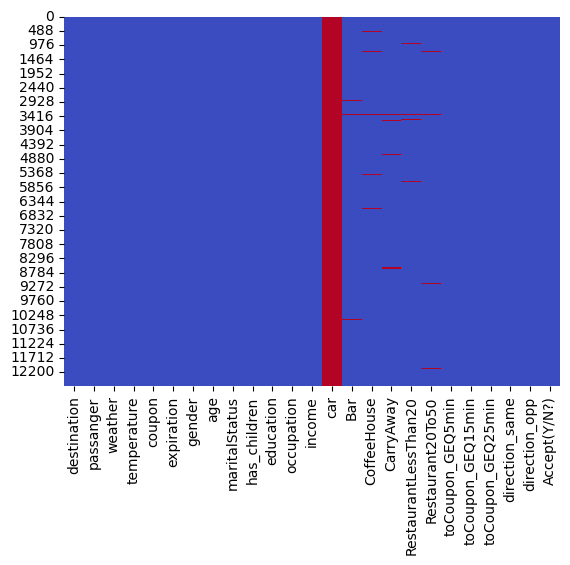

In [10]:
# Null values visualization
# Column "car" has the maxium number of null values ( or NaN )
# cbar --> colour bar. True displays the colour scale, False hides it.

sns.heatmap(df.isnull(), cmap = "coolwarm", cbar = False)
plt.show()

In [11]:
# Total null values

df.isnull().sum().sum()

13370

# Impute and Drop
- Using MODE as the imputation method for imputing categorical data.
- Mode does not affect the distribution of the existing categories.
- Drop column -- "car"
- Impute columns -- "Bar", "CoffeeHouse", "CarryAway", "RestaurantLessThan20", and "Restaurant20To50".

In [13]:
# We notice that out of 12684 values in column "car" only 108 return non-null.
# The remaining 12576 return a null value.
# Therefore, there appears no point in imputing the column "car" with a value.
# We must simply drop ( or remove ) the feature from our dataset.

print(statistics.mode(df["car"]))

nan


In [14]:
print(statistics.mode(df["Bar"]))

never


In [15]:
print(statistics.mode(df["CoffeeHouse"]))

less1


In [16]:
print(statistics.mode(df["CarryAway"]))

1~3


In [17]:
print(statistics.mode(df["RestaurantLessThan20"]))

1~3


In [18]:
print(statistics.mode(df["Restaurant20To50"]))

less1


### Dropping column

In [20]:
# Creating a deep copy, so the changes in the new dataframe won't reflect in the original dataset

df_train = df.copy(deep = True)

In [21]:
# Dropping the column "car"

df_train.drop(columns=["car"], inplace = True)
df_train.head()

destination  passanger weather  temperature                 coupon  \
0  No Urgent Place      Alone   Sunny           55        Restaurant(<20)   
1  No Urgent Place  Friend(s)   Sunny           80           Coffee House   
2  No Urgent Place  Friend(s)   Sunny           80  Carry out & Take away   
3  No Urgent Place  Friend(s)   Sunny           80           Coffee House   
4  No Urgent Place  Friend(s)   Sunny           80           Coffee House   

  expiration  gender age      maritalStatus  has_children  ... CoffeeHouse  \
0         1d  Female  21  Unmarried partner             1  ...       never   
1         2h  Female  21  Unmarried partner             1  ...       never   
2         2h  Female  21  Unmarried partner             1  ...       never   
3         2h  Female  21  Unmarried partner             1  ...       never   
4         1d  Female  21  Unmarried partner             1  ...       never   

  CarryAway RestaurantLessThan20 Restaurant20To50 toCoupon_GEQ5min  \
0       NaN                  4~8              1~3                1   
1       NaN                  4~8              1~3                1   
2       NaN                  4~8              1~3                1   
3       NaN                  4~8              1~3                1   
4       NaN                  4~8              1~3                1   

  toCoupon_GEQ15min toCoupon_GEQ25min direction_same  direction_opp  \
0                 0                 0              0              1   
1                 0                 0              0              1   
2                 1                 0              0              1   
3                 1                 0              0              1   
4                 1                 0              0              1   

   Accept(Y/N?)  
0             1  
1             0  
2             1  
3             0  
4             0  

[5 rows x 24 columns]

### Imputing data with mode

In [23]:
df_train["Bar"] = df_train["Bar"].fillna(df_train["Bar"].mode()[0])

In [24]:
df_train["CoffeeHouse"] = df_train["CoffeeHouse"].fillna(df_train["CoffeeHouse"].mode()[0])

In [25]:
df_train["CarryAway"] = df_train["CarryAway"].fillna(df_train["CarryAway"].mode()[0])

In [26]:
df_train["RestaurantLessThan20"] = df_train["RestaurantLessThan20"].fillna(df_train["RestaurantLessThan20"].mode()[0])

In [27]:
df_train["Restaurant20To50"] = df_train["Restaurant20To50"].fillna(df_train["Restaurant20To50"].mode()[0])

# Check Imputation, Drop, and No-null values

In [29]:
df_train.head()

destination  passanger weather  temperature                 coupon  \
0  No Urgent Place      Alone   Sunny           55        Restaurant(<20)   
1  No Urgent Place  Friend(s)   Sunny           80           Coffee House   
2  No Urgent Place  Friend(s)   Sunny           80  Carry out & Take away   
3  No Urgent Place  Friend(s)   Sunny           80           Coffee House   
4  No Urgent Place  Friend(s)   Sunny           80           Coffee House   

  expiration  gender age      maritalStatus  has_children  ... CoffeeHouse  \
0         1d  Female  21  Unmarried partner             1  ...       never   
1         2h  Female  21  Unmarried partner             1  ...       never   
2         2h  Female  21  Unmarried partner             1  ...       never   
3         2h  Female  21  Unmarried partner             1  ...       never   
4         1d  Female  21  Unmarried partner             1  ...       never   

  CarryAway RestaurantLessThan20 Restaurant20To50 toCoupon_GEQ5min  \
0       1~3                  4~8              1~3                1   
1       1~3                  4~8              1~3                1   
2       1~3                  4~8              1~3                1   
3       1~3                  4~8              1~3                1   
4       1~3                  4~8              1~3                1   

  toCoupon_GEQ15min toCoupon_GEQ25min direction_same  direction_opp  \
0                 0                 0              0              1   
1                 0                 0              0              1   
2                 1                 0              0              1   
3                 1                 0              0              1   
4                 1                 0              0              1   

   Accept(Y/N?)  
0             1  
1             0  
2             1  
3             0  
4             0  

[5 rows x 24 columns]

In [30]:
# Column "car" has been dropped

df_train.shape

(12684, 24)

In [31]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   coupon                12684 non-null  object
 5   expiration            12684 non-null  object
 6   gender                12684 non-null  object
 7   age                   12684 non-null  object
 8   maritalStatus         12684 non-null  object
 9   has_children          12684 non-null  int64 
 10  education             12684 non-null  object
 11  occupation            12684 non-null  object
 12  income                12684 non-null  object
 13  Bar                   12684 non-null  object
 14  CoffeeHouse           12684 non-null  object
 15  CarryAway             12684 non-null

In [32]:
df_train.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Accept(Y/N?)            0
dtype: int64

In [33]:
df_train.isnull().sum().sum()

0

# Feature Distribution
- Numerical
- Categorical

In [35]:
# The star ( * ) before categorical_features and numerical_features in the print statement is an unpacking operator.
# It unpacks its elements so that each element is passed as a separate argument.

categorical_features = []
numerical_features = []

for i in df_train.columns:
    
    if df_train[i].dtype == "object":
        categorical_features.append(i)
        
    elif df_train[i].dtype == "int64":
        numerical_features.append(i)

print("***************************************")
print("Categorical Features :", *categorical_features, sep = " ")
print("***************************************")
print("Numerical Features :", *numerical_features, sep = " ")
print("***************************************")

***************************************
Categorical Features : destination passanger weather coupon expiration gender age maritalStatus education occupation income Bar CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50
***************************************
Numerical Features : temperature has_children toCoupon_GEQ5min toCoupon_GEQ15min toCoupon_GEQ25min direction_same direction_opp Accept(Y/N?)
***************************************


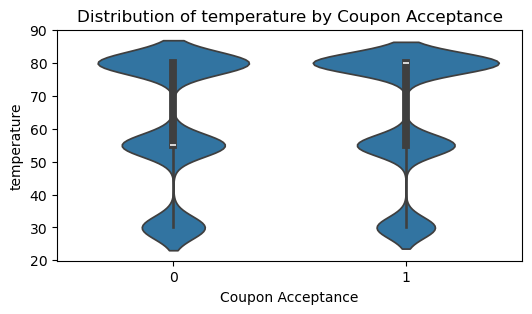

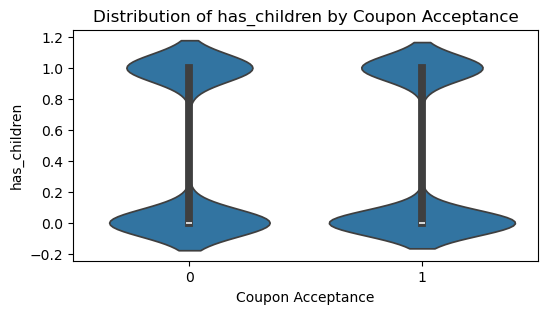

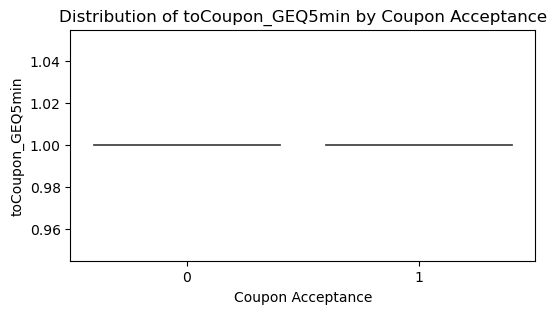

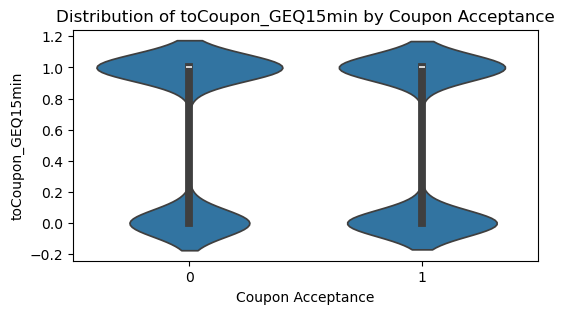

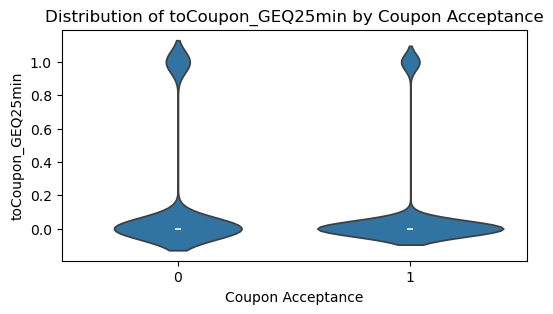

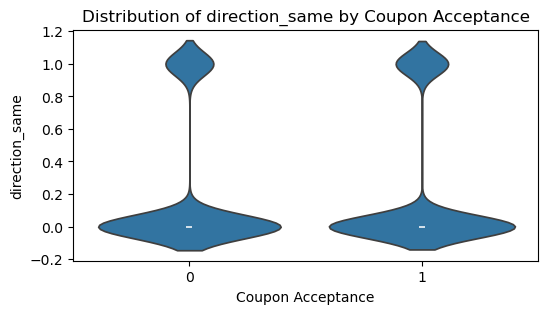

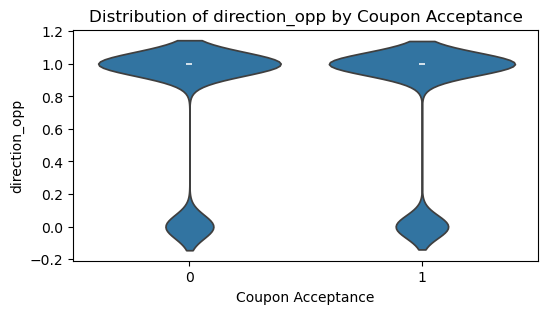

In [36]:
# Numerical Features against the Target Variable

for i in numerical_features:
    if i != "Accept(Y/N?)":
        plt.figure(figsize = (6, 3))
        sns.violinplot(data = df_train, x = "Accept(Y/N?)", y = i)
        plt.title(f"Distribution of {i} by Coupon Acceptance")
        plt.xlabel("Coupon Acceptance")
        plt.ylabel(i)
        plt.show()

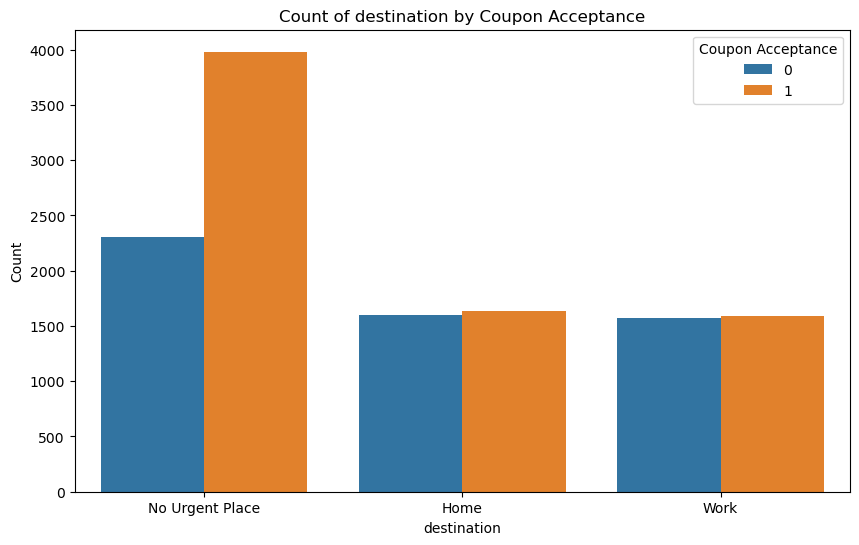

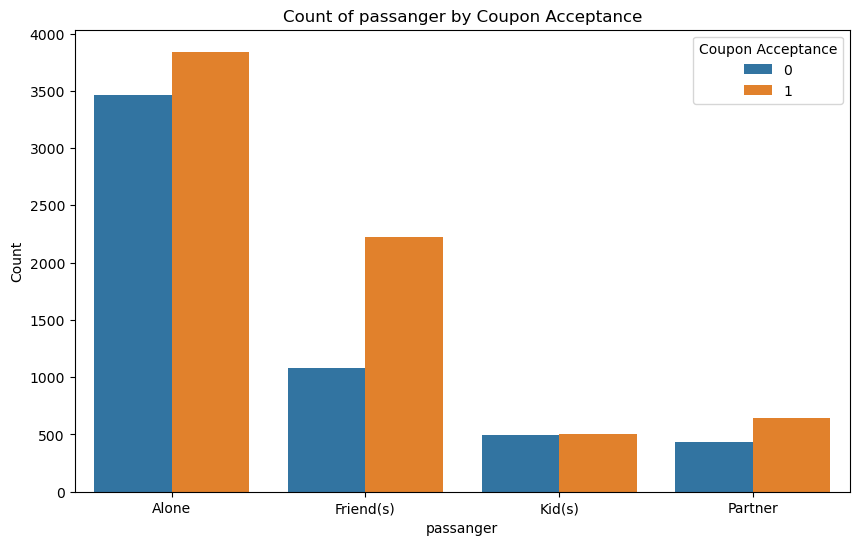

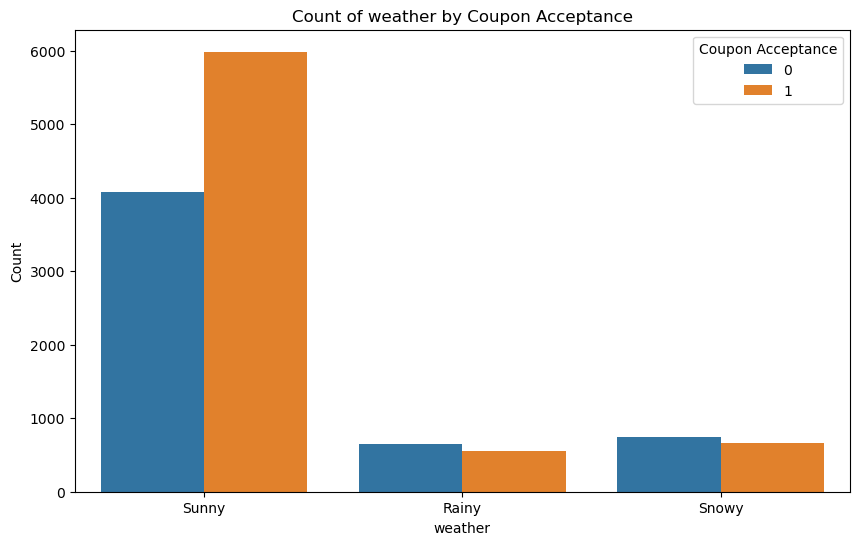

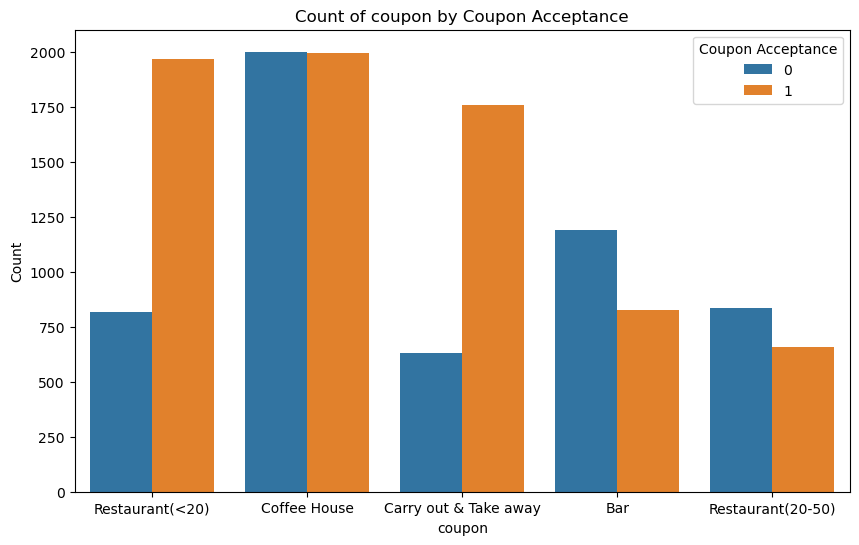

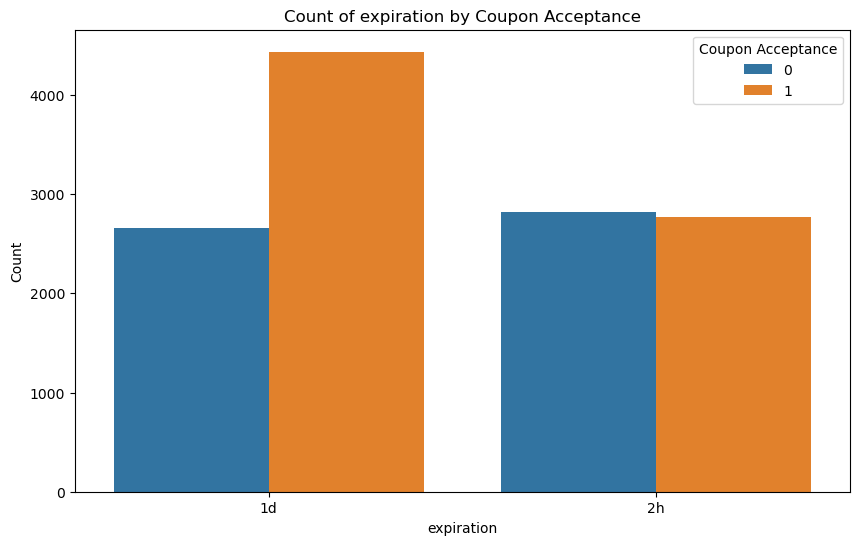

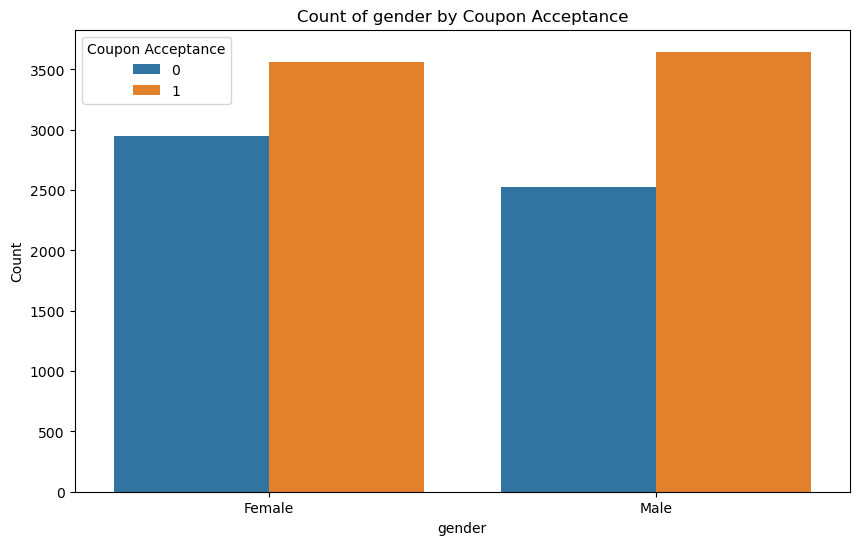

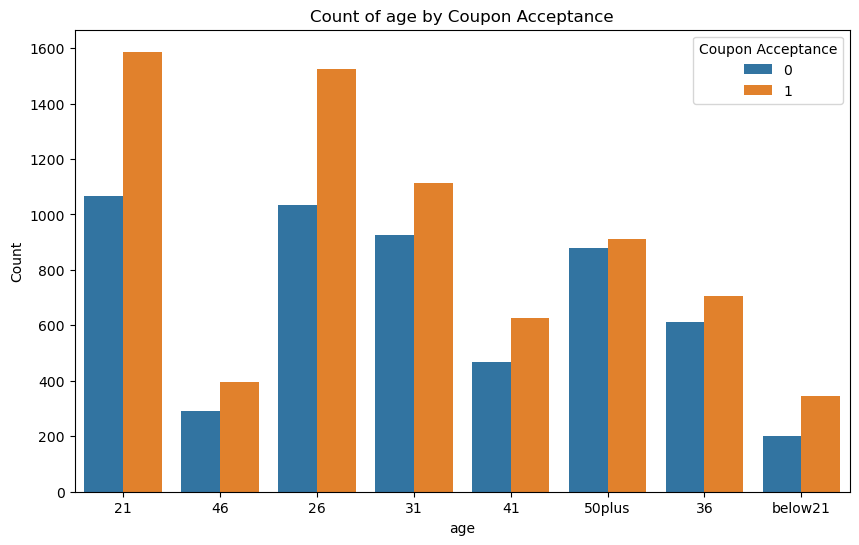

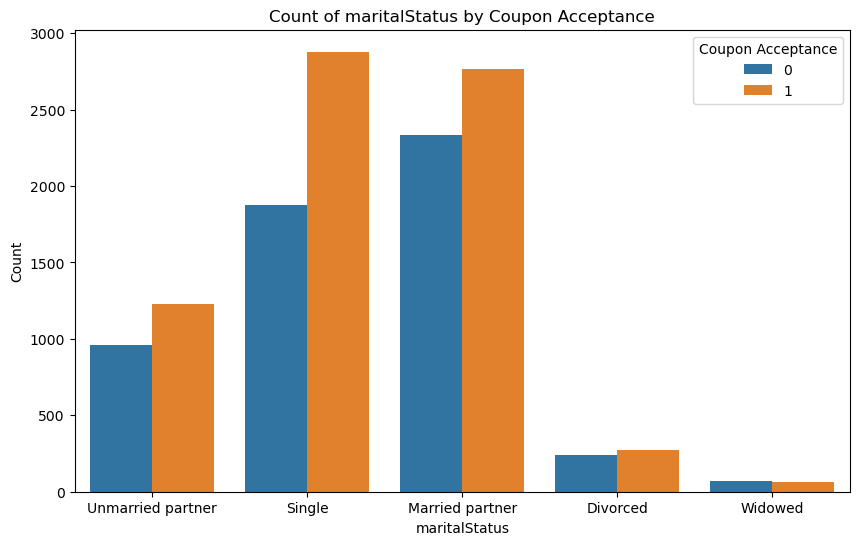

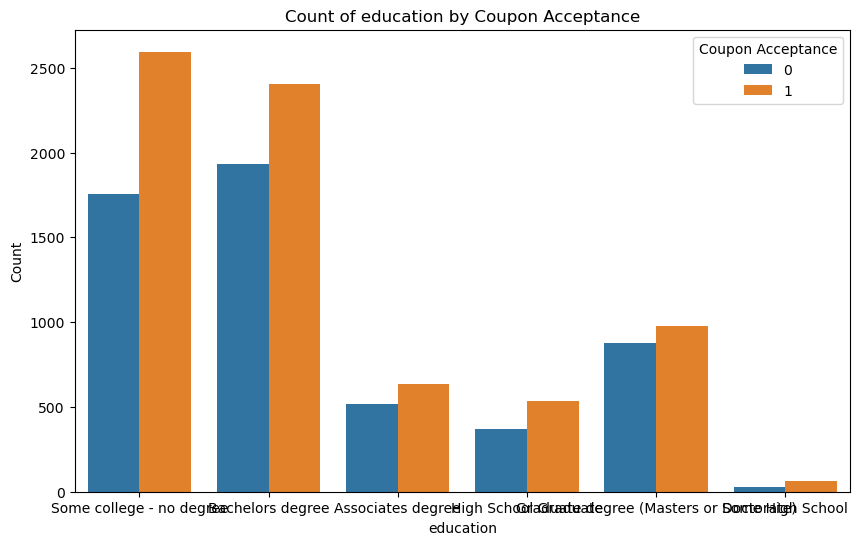

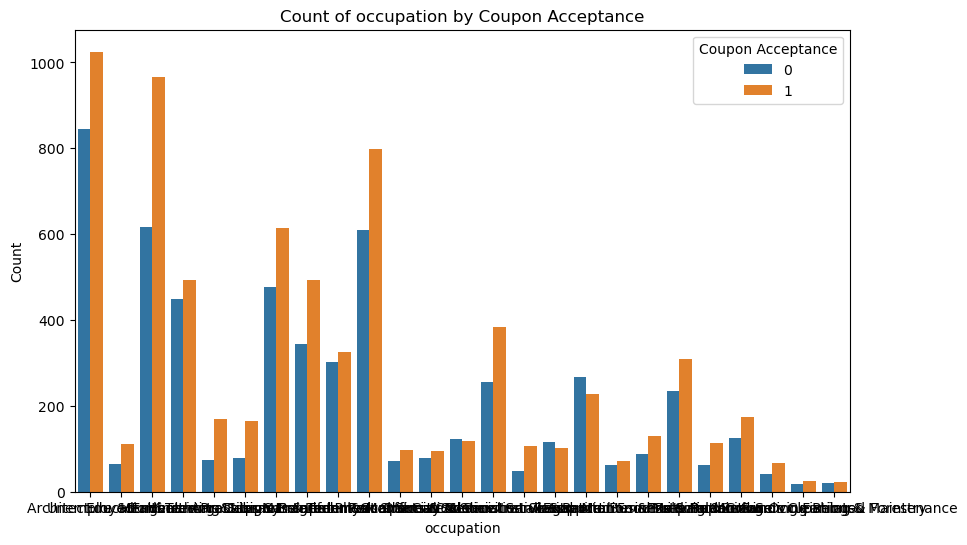

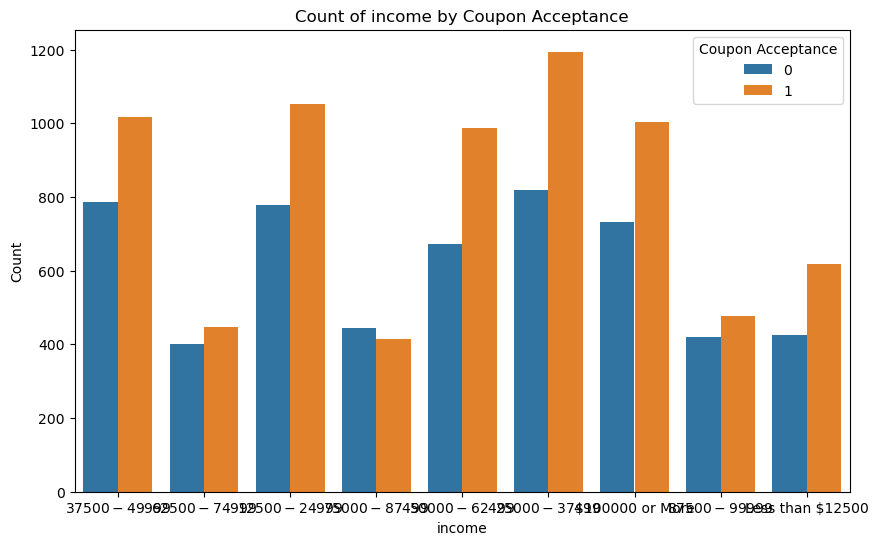

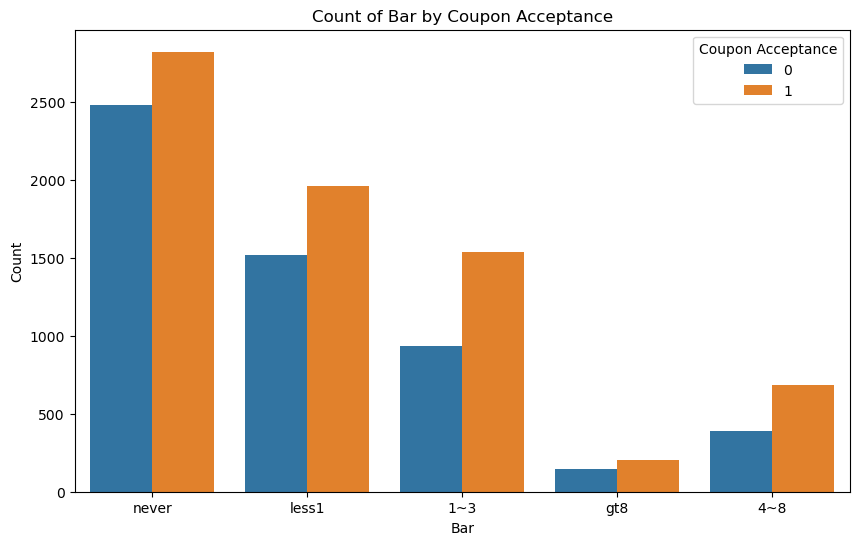

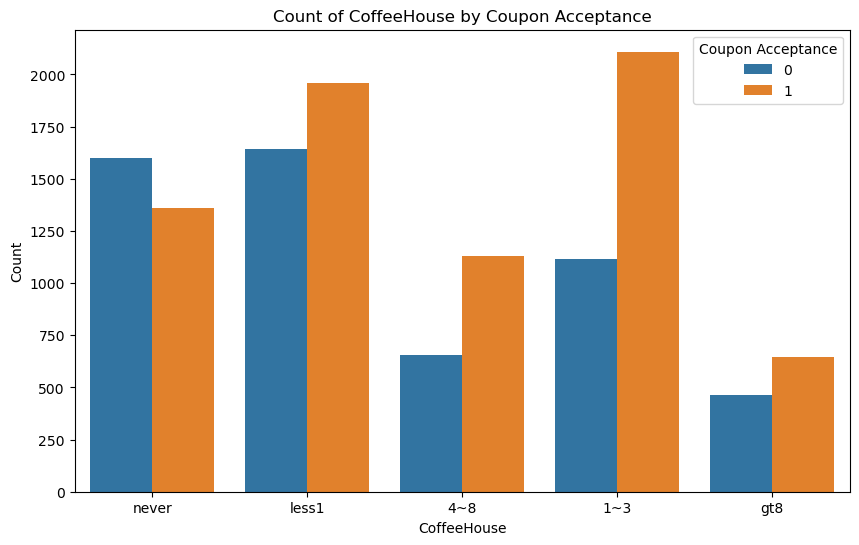

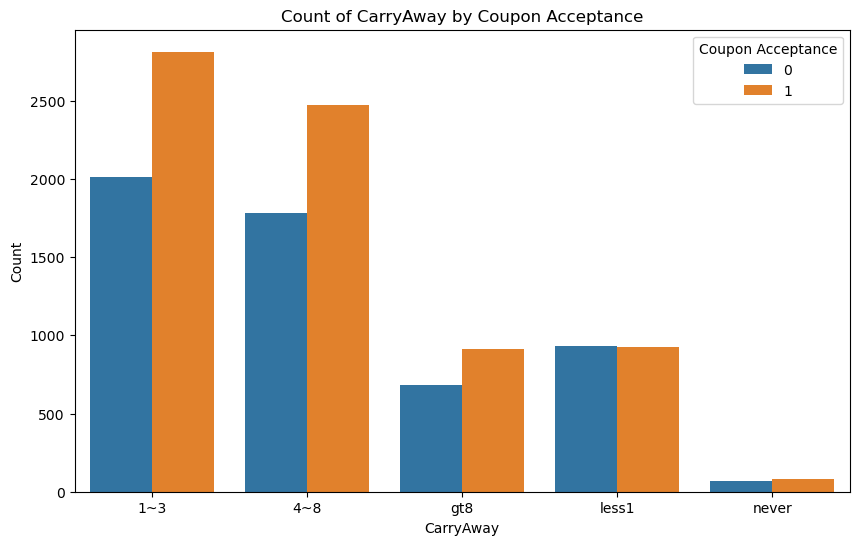

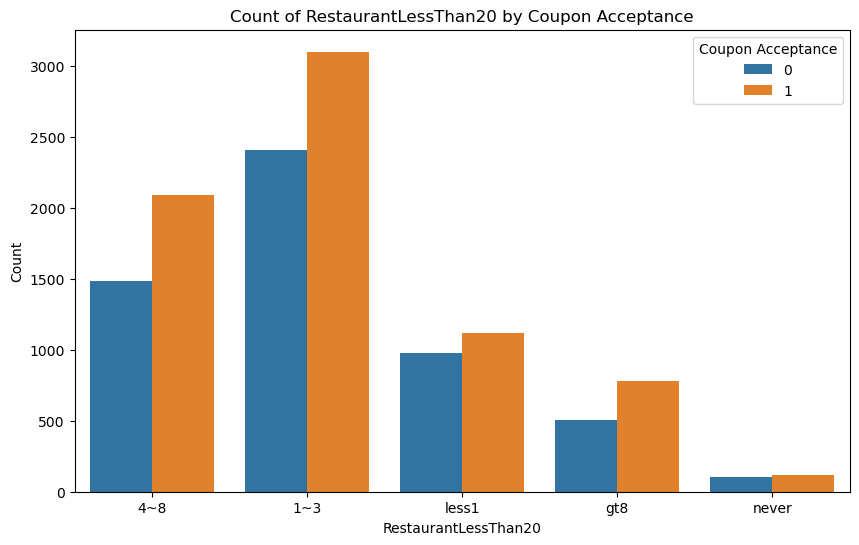

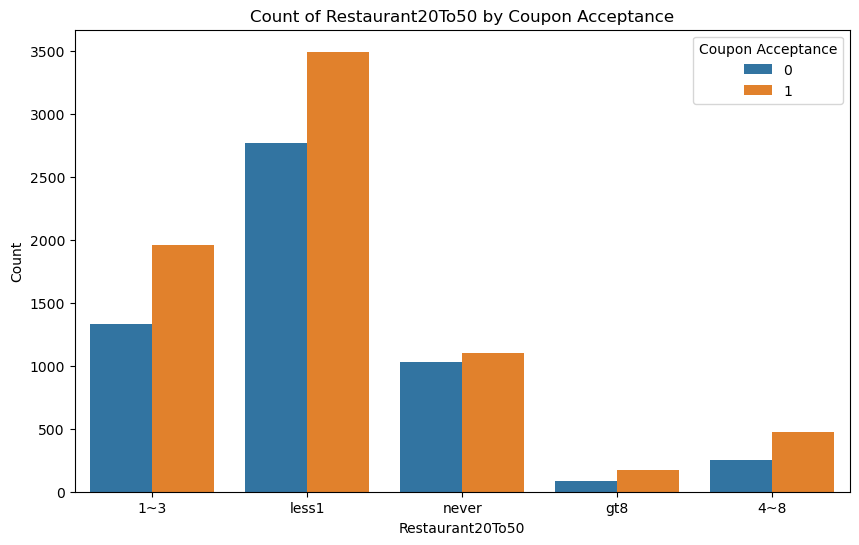

In [37]:
# Categorical Features against the Target Variable

for j in categorical_features:
    plt.figure(figsize = (10, 6))
    sns.countplot(data = df_train, x = j, hue = "Accept(Y/N?)")
    plt.title(f"Count of {j} by Coupon Acceptance")
    plt.xlabel(j)
    plt.ylabel("Count")
    plt.legend(title = "Coupon Acceptance")
    plt.show()

# Feature Analysis
1) Numerical
2) Categorical

### 1) Analysis of Numerical Features

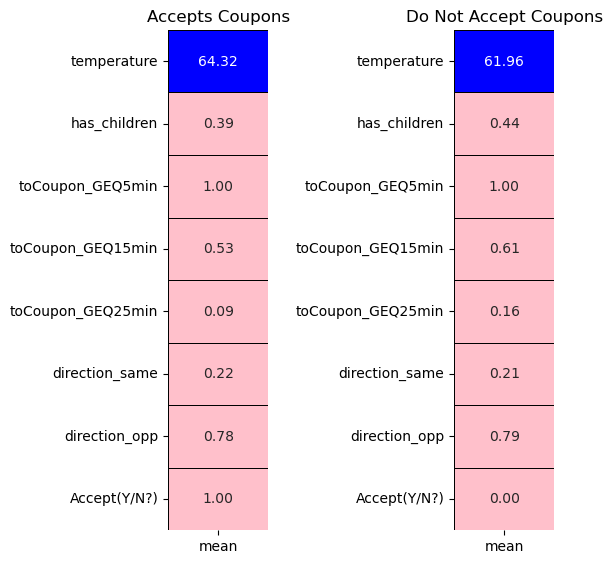

In [40]:
# annot = True --> displays the values inside the bar

colors = ["pink", "blue"]

accept_coupon = df_train[df_train["Accept(Y/N?)"] == 1].describe().T
reject_coupon = df_train[df_train["Accept(Y/N?)"] == 0].describe().T

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (6, 6))

plt.subplot(1, 2, 1)
sns.heatmap(accept_coupon[["mean"]], annot = True, cmap = colors, linewidths = 0.4, linecolor = "black", cbar = False, fmt = '.2f')
plt.title("Accepts Coupons")

plt.subplot(1, 2, 2)
sns.heatmap(reject_coupon[["mean"]], annot = True, cmap = colors, linewidths = 0.4, linecolor = "black", cbar = False, fmt = '.2f')
plt.title("Do Not Accept Coupons")

# padding --> 2
fig.tight_layout(pad = 2)

In [41]:
# We notice that column "toCoupon_GEQ5min" has equal representation in both coupons accepted and rejected.
# We can try ANOVA test to check if we can drop the column.

### ANOVA Test

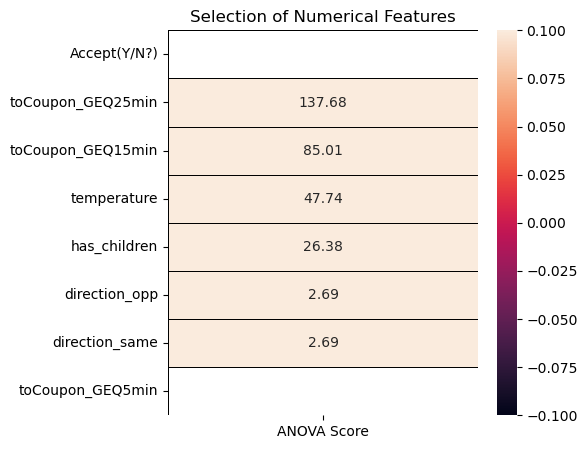

In [43]:
# from sklearn.feature_selection import SelectKBest, f_classif

features = df_train.loc[:,numerical_features]
target = df_train.loc[:,"Accept(Y/N?)"]

best_features = SelectKBest(score_func = f_classif, k = "all")
fit = best_features.fit(features, target)

featureScores = pd.DataFrame(data = fit.scores_, index = list(features.columns), columns = ["ANOVA Score"])

plt.subplots(figsize= (5, 5))
sns.heatmap(featureScores.sort_values(ascending = False, by = "ANOVA Score"),
            annot = True, linewidths = 0.4, linecolor = 'black', fmt = ".2f")

plt.title("Selection of Numerical Features")
plt.show()

In [44]:
# We may drop the column "toCoupon_GEQ5min"

df_train.drop(columns=["toCoupon_GEQ5min"], inplace = True)
df_train.head()

destination  passanger weather  temperature                 coupon  \
0  No Urgent Place      Alone   Sunny           55        Restaurant(<20)   
1  No Urgent Place  Friend(s)   Sunny           80           Coffee House   
2  No Urgent Place  Friend(s)   Sunny           80  Carry out & Take away   
3  No Urgent Place  Friend(s)   Sunny           80           Coffee House   
4  No Urgent Place  Friend(s)   Sunny           80           Coffee House   

  expiration  gender age      maritalStatus  has_children  ...    Bar  \
0         1d  Female  21  Unmarried partner             1  ...  never   
1         2h  Female  21  Unmarried partner             1  ...  never   
2         2h  Female  21  Unmarried partner             1  ...  never   
3         2h  Female  21  Unmarried partner             1  ...  never   
4         1d  Female  21  Unmarried partner             1  ...  never   

  CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
0       never       1~3                  4~8              1~3   
1       never       1~3                  4~8              1~3   
2       never       1~3                  4~8              1~3   
3       never       1~3                  4~8              1~3   
4       never       1~3                  4~8              1~3   

  toCoupon_GEQ15min toCoupon_GEQ25min direction_same  direction_opp  \
0                 0                 0              0              1   
1                 0                 0              0              1   
2                 1                 0              0              1   
3                 1                 0              0              1   
4                 1                 0              0              1   

   Accept(Y/N?)  
0             1  
1             0  
2             1  
3             0  
4             0  

[5 rows x 23 columns]

In [45]:
df_train.shape

(12684, 23)

In [46]:
df_train.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ15min',
       'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'Accept(Y/N?)'],
      dtype='object')

### 2) Analysis of Categorical Features

#### Feature "destination"

In [49]:
# Values in column "destination" for which the column "Accept(Y/N?)" return 1 --> accept coupons ( Y )

col_destination = df_train[df_train["Accept(Y/N?)"] == 1]["destination"].value_counts()

print(col_destination.sum())
col_destination

7210


destination
No Urgent Place    3982
Home               1639
Work               1589
Name: count, dtype: int64

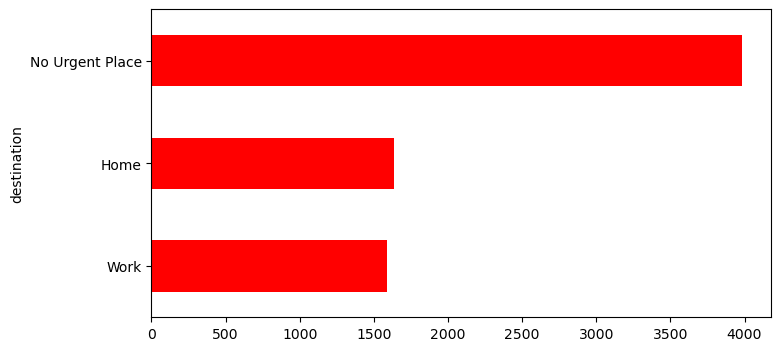

In [50]:
# Visualising "destination" accepting coupons

col_destination.sort_values(ascending = True).plot.barh(figsize = (8, 4), color = "red")
plt.show()

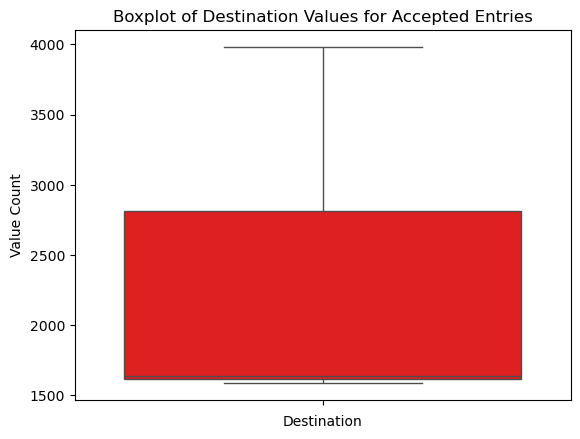

In [51]:
sns.boxplot(data = col_destination, color = "red")
plt.xlabel("Destination")
plt.ylabel("Value Count")
plt.title("Boxplot of Destination Values for Accepted Entries")
plt.show()

In [52]:
# It is highly skewed

col_destination.skew()

1.7294458219723563

#### Feature "passanger"

In [54]:
col_passanger = df_train[df_train["Accept(Y/N?)"] == 1]["passanger"].value_counts()
col_passanger

passanger
Alone        3841
Friend(s)    2221
Partner       640
Kid(s)        508
Name: count, dtype: int64

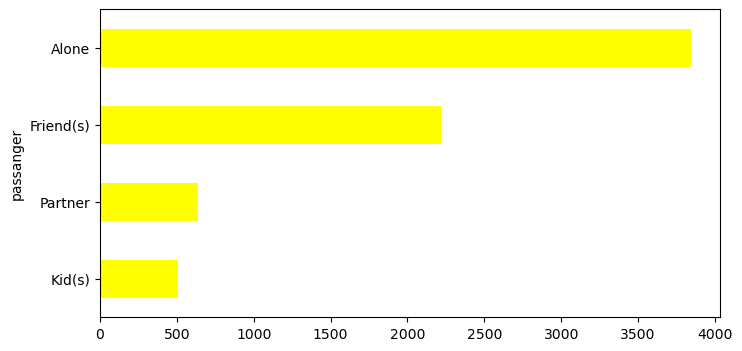

In [55]:
col_passanger.sort_values(ascending = True).plot.barh(figsize = (8, 4), color = "yellow")
plt.show()

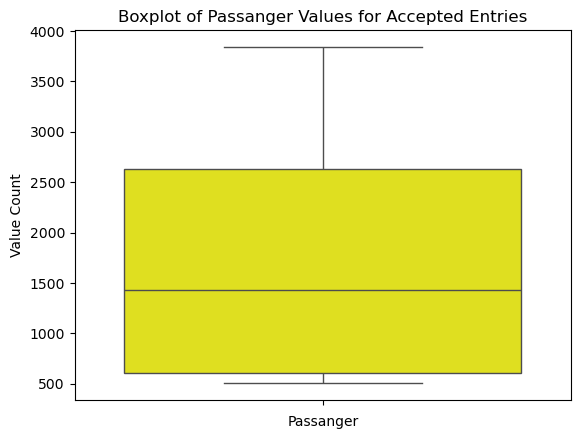

In [56]:
sns.boxplot(data = col_passanger, color = "yellow")
plt.xlabel("Passanger")
plt.ylabel("Value Count")
plt.title("Boxplot of Passanger Values for Accepted Entries")
plt.show()

In [57]:
# Moderately skewed

col_passanger.skew()

0.8338262456756597

#### Feature "weather"

In [59]:
col_weather = df_train[df_train["Accept(Y/N?)"] == 1]["weather"].value_counts()
col_weather

weather
Sunny    5989
Snowy     661
Rainy     560
Name: count, dtype: int64

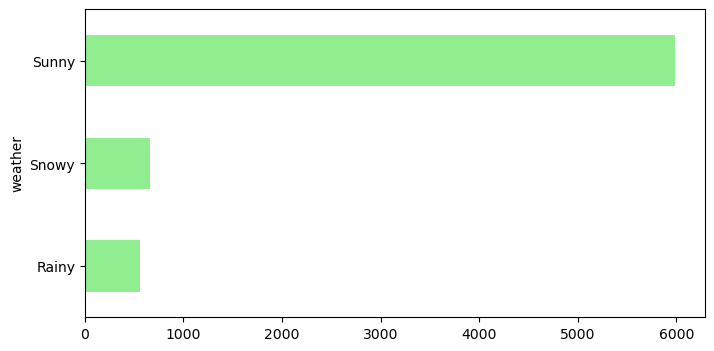

In [60]:
col_weather.sort_values(ascending = True).plot.barh(figsize = (8, 4), color = "lightgreen")
plt.show()

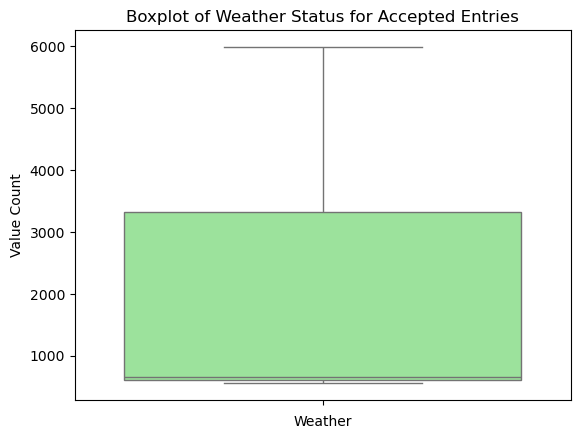

In [61]:
sns.boxplot(data = col_weather, color = "lightgreen")
plt.xlabel("Weather")
plt.ylabel("Value Count")
plt.title("Boxplot of Weather Status for Accepted Entries")
plt.show()

In [62]:
# Highly skewed

col_weather.skew()

1.729990215086089

#### Feature "coupon"

In [64]:
col_coupon = df_train[df_train["Accept(Y/N?)"] == 1]["coupon"].value_counts()
col_coupon

coupon
Coffee House             1995
Restaurant(<20)          1970
Carry out & Take away    1760
Bar                       827
Restaurant(20-50)         658
Name: count, dtype: int64

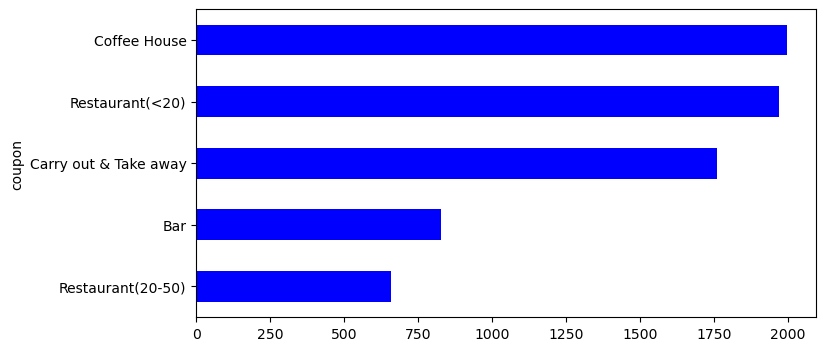

In [65]:
col_coupon.sort_values(ascending = True).plot.barh(figsize = (8, 4), color = "blue")
plt.show()

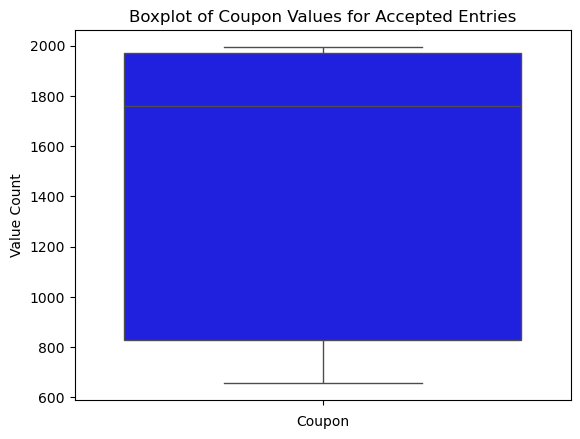

In [66]:
sns.boxplot(data = col_coupon, color = "blue")
plt.xlabel("Coupon")
plt.ylabel("Value Count")
plt.title("Boxplot of Coupon Values for Accepted Entries")
plt.show()

In [67]:
# Negatively skewed

col_coupon.skew()

-0.5610175720582304

#### Feature "expiration"

In [69]:
col_expiration = df_train[df_train["Accept(Y/N?)"] == 1]["expiration"].value_counts()
col_expiration

expiration
1d    4436
2h    2774
Name: count, dtype: int64

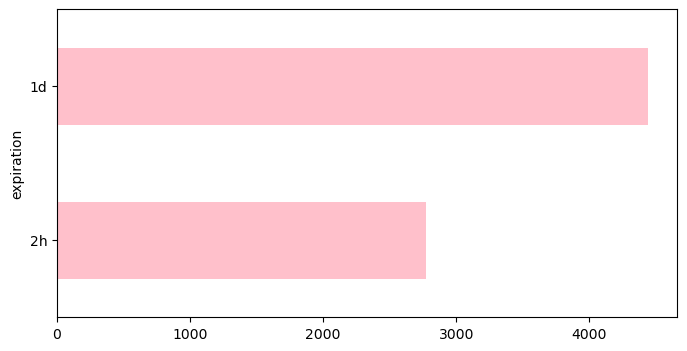

In [70]:
col_expiration.sort_values(ascending = True).plot.barh(figsize = (8, 4), color = "pink")
plt.show()

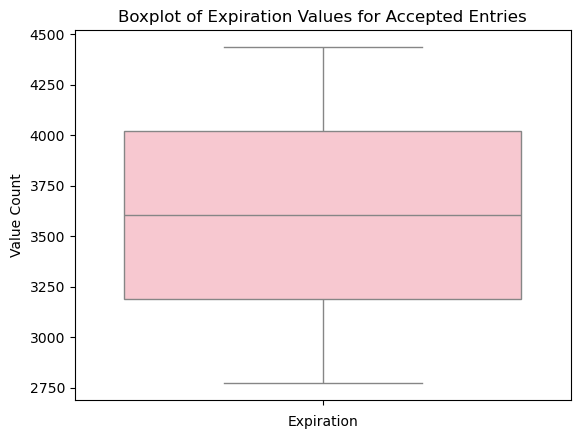

In [71]:
sns.boxplot(data = col_expiration, color = "pink")
plt.xlabel("Expiration")
plt.ylabel("Value Count")
plt.title("Boxplot of Expiration Values for Accepted Entries")
plt.show()

In [72]:
# No skewness

col_expiration.skew()

nan

#### Feature "gender"

In [74]:
col_gender = df_train[df_train["Accept(Y/N?)"] == 1]["gender"].value_counts()
col_gender

gender
Male      3647
Female    3563
Name: count, dtype: int64

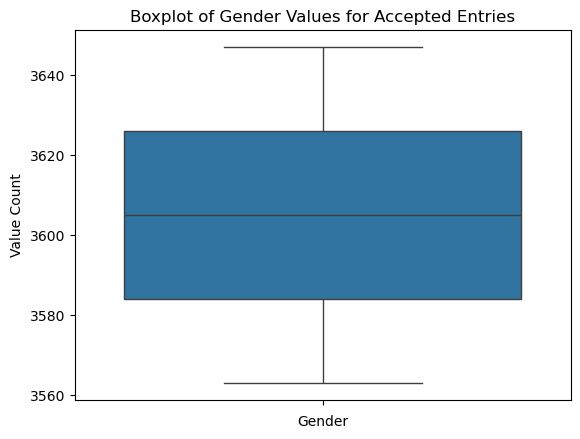

In [75]:
sns.boxplot(data = col_gender)
plt.xlabel("Gender")
plt.ylabel("Value Count")
plt.title("Boxplot of Gender Values for Accepted Entries")
plt.show()

In [76]:
# No skewness

col_gender.skew()

nan

#### Feature "age"

In [78]:
df_train["age"].unique() 

array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

In [79]:
# The following data can be converted to numerical data

# 50plus ~ 51
# below21 ~ 20

df_train["age"] = df_train["age"].apply(lambda i : 51 if i == "50plus" else ( 20 if i == "below21" else i))

In [80]:
col_age = df_train[df_train["Accept(Y/N?)"] == 1]["age"].value_counts()
col_age

age
21    1587
26    1525
31    1114
51     910
36     706
41     626
46     395
20     347
Name: count, dtype: int64

In [81]:
# Object to int data type

df_train["age"] = df_train["age"].astype("int64")

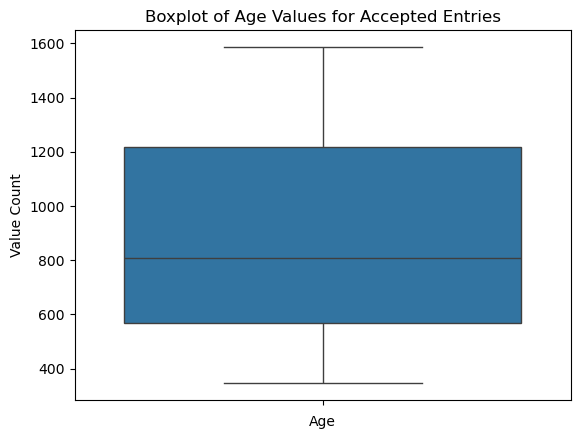

In [82]:
sns.boxplot(data = col_age)
plt.xlabel("Age")
plt.ylabel("Value Count")
plt.title("Boxplot of Age Values for Accepted Entries")
plt.show()

In [83]:
# Fairly skewed

col_age.skew()

0.43696816365600477

#### Feature "maritalStatus"

In [85]:
col_maritalStatus = df_train[df_train["Accept(Y/N?)"] == 1]["maritalStatus"].value_counts()
col_maritalStatus

maritalStatus
Single               2879
Married partner      2769
Unmarried partner    1227
Divorced              273
Widowed                62
Name: count, dtype: int64

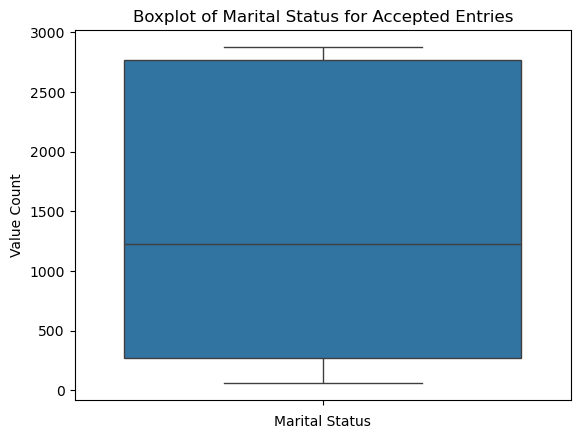

In [86]:
sns.boxplot(data = col_maritalStatus)
plt.xlabel("Marital Status")
plt.ylabel("Value Count")
plt.title("Boxplot of Marital Status for Accepted Entries")
plt.show()

In [87]:
# Fairly skewed

col_maritalStatus.skew()

0.1865788686807726

#### Feature "education"

In [89]:
col_education = df_train[df_train["Accept(Y/N?)"] == 1]["education"].value_counts()
col_education

education
Some college - no degree                  2595
Bachelors degree                          2403
Graduate degree (Masters or Doctorate)     975
Associates degree                          638
High School Graduate                       536
Some High School                            63
Name: count, dtype: int64

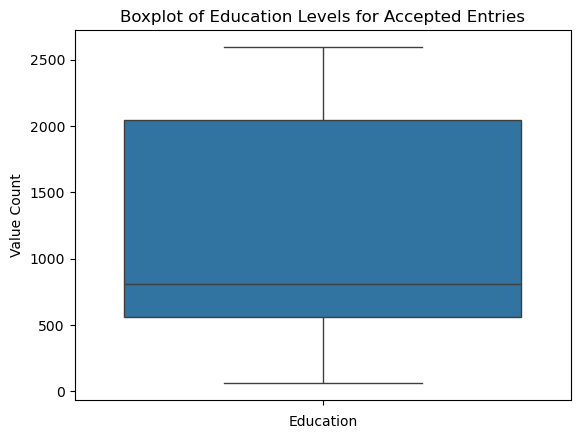

In [90]:
sns.boxplot(data = col_education)
plt.xlabel("Education")
plt.ylabel("Value Count")
plt.title("Boxplot of Education Levels for Accepted Entries")
plt.show()

In [91]:
# Moderately skewed

col_education.skew()

0.6451994662726821

#### Feature "occupation"

In [93]:
col_occupation = df_train[df_train["Accept(Y/N?)"] == 1]["occupation"].value_counts()
col_occupation

occupation
Unemployed                                   1025
Student                                       967
Computer & Mathematical                       798
Sales & Related                               615
Education&Training&Library                    494
Management                                    493
Office & Administrative Support               384
Arts Design Entertainment Sports & Media      326
Business & Financial                          310
Retired                                       227
Food Preparation & Serving Related            174
Healthcare Support                            169
Healthcare Practitioners & Technical          165
Transportation & Material Moving              130
Community & Social Services                   118
Protective Service                            113
Architecture & Engineering                    111
Construction & Extraction                     106
Legal                                         103
Life Physical Social Science           

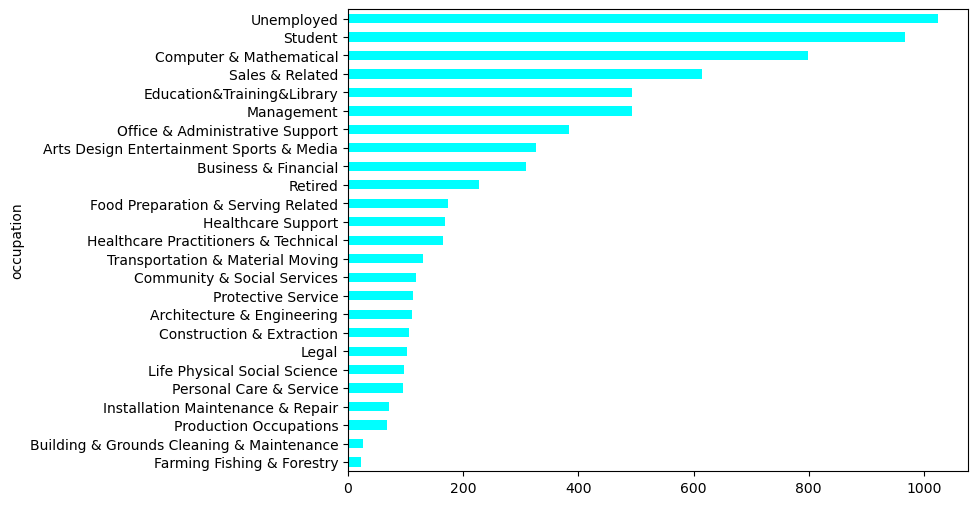

In [94]:
col_occupation.sort_values(ascending = True).plot.barh(figsize = (8, 6), color = "cyan")
plt.show()

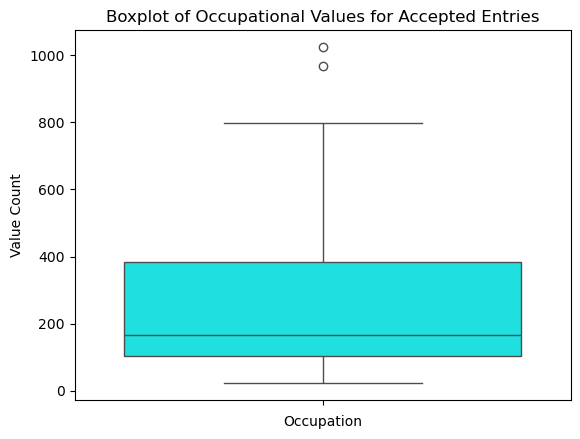

In [95]:
# There appears to be outliers in the data

sns.boxplot(data = col_occupation, color = "cyan")
plt.xlabel("Occupation")
plt.ylabel("Value Count")
plt.title("Boxplot of Occupational Values for Accepted Entries")
plt.show()

### Outlier Treatment in column "occupation"
- While keeping the values and merging them together as they point to 1 (accept) coupons in the target feature

In [97]:
# Taking values with sum of values over 200

job_list = ['Unemployed','Student','Computer & Mathematical','Sales & Related','Education&Training&Library',
            'Management','Office & Administrative Support','Arts Design Entertainment Sports & Media',
            'Business & Financial','Retired']

In [98]:
df_train["occupation"] = df_train["occupation"].apply(lambda i : i if i in job_list else "Jobs with Low Manpower")
df_train.occupation.value_counts()

occupation
Jobs with Low Manpower                      2641
Unemployed                                  1870
Student                                     1584
Computer & Mathematical                     1408
Sales & Related                             1093
Education&Training&Library                   943
Management                                   838
Office & Administrative Support              639
Arts Design Entertainment Sports & Media     629
Business & Financial                         544
Retired                                      495
Name: count, dtype: int64

In [99]:
# Values in column "occupation" for which the column "Accept(Y/N?)" return 1 --> accept coupons ( Y )

col_occupation = df_train[df_train["Accept(Y/N?)"] == 1]["occupation"].value_counts()
col_occupation

occupation
Jobs with Low Manpower                      1571
Unemployed                                  1025
Student                                      967
Computer & Mathematical                      798
Sales & Related                              615
Education&Training&Library                   494
Management                                   493
Office & Administrative Support              384
Arts Design Entertainment Sports & Media     326
Business & Financial                         310
Retired                                      227
Name: count, dtype: int64

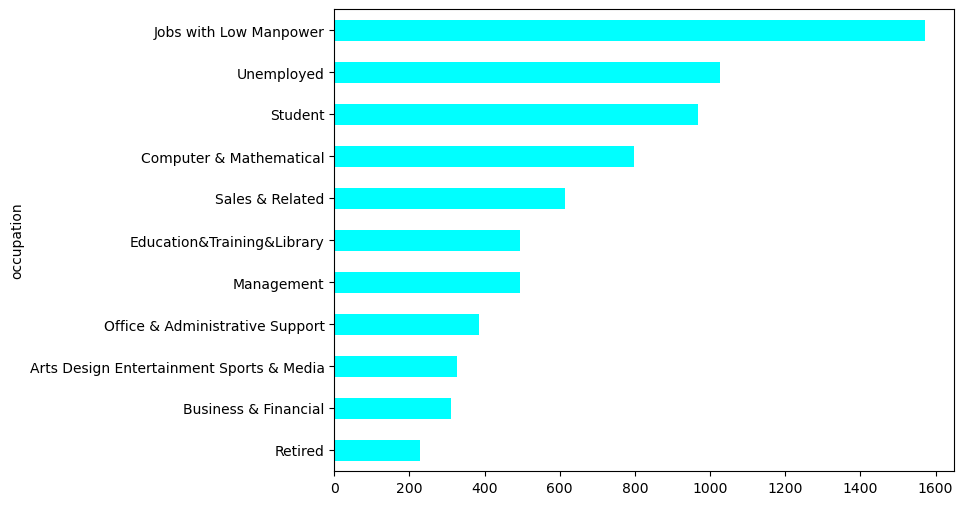

In [100]:
col_occupation.sort_values(ascending = True).plot.barh(figsize = (8, 6), color = "cyan")
plt.show()

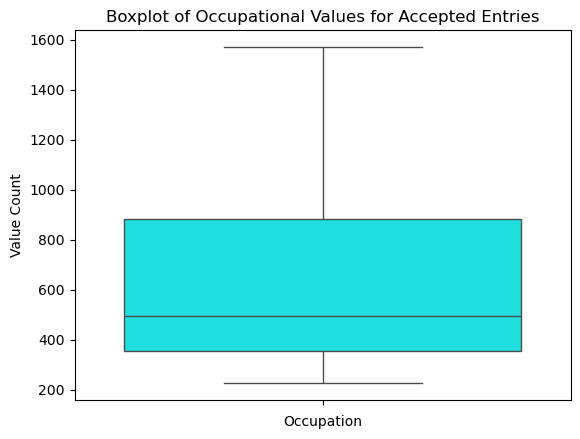

In [101]:
# No outlier

sns.boxplot(data = col_occupation, color = "cyan")
plt.xlabel("Occupation")
plt.ylabel("Value Count")
plt.title("Boxplot of Occupational Values for Accepted Entries")
plt.show()

In [102]:
# Highly skewed

col_occupation.skew()

1.2368688796971352

#### Feature "income"

In [104]:
col_income = df_train[df_train["Accept(Y/N?)"] == 1]["income"].value_counts()
col_income

income
$25000 - $37499     1194
$12500 - $24999     1052
$37500 - $49999     1018
$100000 or More     1004
$50000 - $62499      988
Less than $12500     618
$87500 - $99999      476
$62500 - $74999      446
$75000 - $87499      414
Name: count, dtype: int64

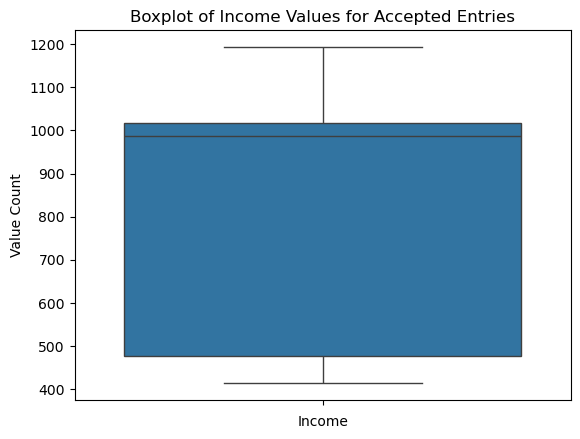

In [105]:
sns.boxplot(data = col_income)
plt.xlabel("Income")
plt.ylabel("Value Count")
plt.title("Boxplot of Income Values for Accepted Entries")
plt.show()

In [106]:
# Negatively skewed

col_income.skew()

-0.23127517148135002

#### Feature "Bar"

In [108]:
col_Bar = df_train[df_train["Accept(Y/N?)"] == 1]["Bar"].value_counts()
col_Bar

Bar
never    2822
less1    1963
1~3      1538
4~8       686
gt8       201
Name: count, dtype: int64

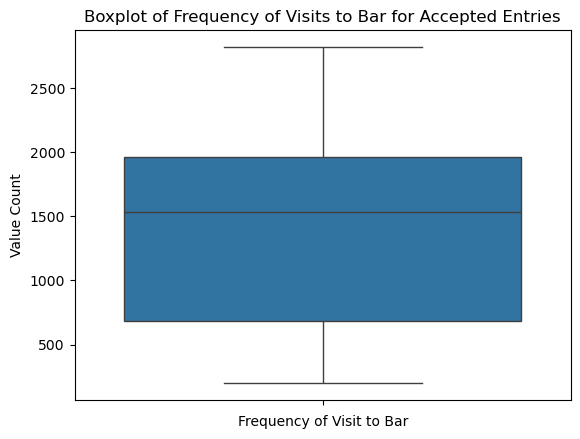

In [109]:
sns.boxplot(data = col_Bar)
plt.xlabel("Frequency of Visit to Bar")
plt.ylabel("Value Count")
plt.title("Boxplot of Frequency of Visits to Bar for Accepted Entries")
plt.show()

In [110]:
# Fairly skewed

col_Bar.skew()

0.1598323641560564

#### Feature "CoffeeHouse"

In [112]:
col_CoffeeHouse = df_train[df_train["Accept(Y/N?)"] == 1]["CoffeeHouse"].value_counts()
col_CoffeeHouse

CoffeeHouse
1~3      2109
less1    1961
never    1362
4~8      1130
gt8       648
Name: count, dtype: int64

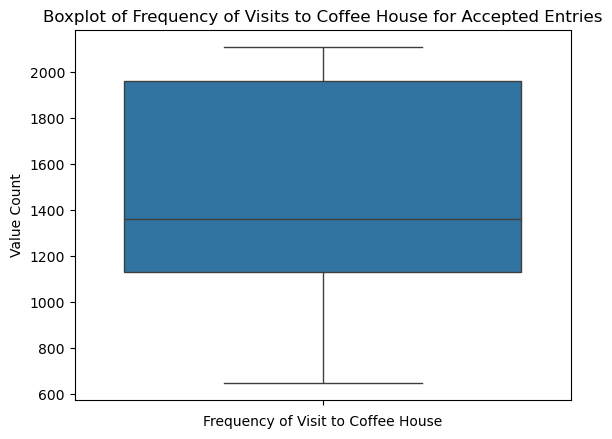

In [113]:
sns.boxplot(data = col_CoffeeHouse)
plt.xlabel("Frequency of Visit to Coffee House")
plt.ylabel("Value Count")
plt.title("Boxplot of Frequency of Visits to Coffee House for Accepted Entries")
plt.show()

In [114]:
# Negatively skewed

col_CoffeeHouse.skew()

-0.18148691610941858

#### Feature "CarryAway"

In [116]:
col_CarryAway = df_train[df_train["Accept(Y/N?)"] == 1]["CarryAway"].value_counts()
col_CarryAway

CarryAway
1~3      2813
4~8      2474
less1     927
gt8       914
never      82
Name: count, dtype: int64

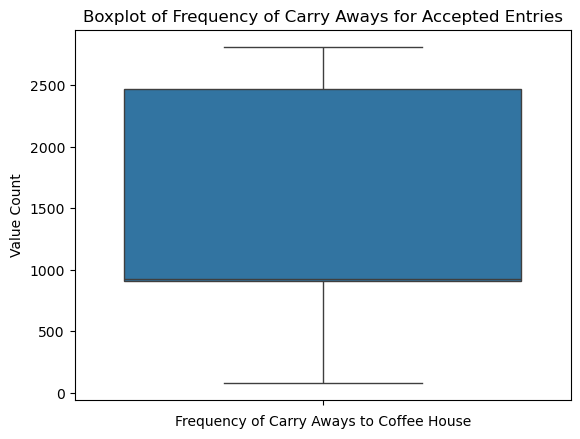

In [117]:
sns.boxplot(data = col_CarryAway)
plt.xlabel("Frequency of Carry Aways to Coffee House")
plt.ylabel("Value Count")
plt.title("Boxplot of Frequency of Carry Aways for Accepted Entries")
plt.show()

In [118]:
# Fairly skewed

col_CarryAway.skew()

0.23697451674914952

#### Feature "RestanurantLessThan20"

In [120]:
col_RestaurantLessThan20 = df_train[df_train["Accept(Y/N?)"] == 1]["RestaurantLessThan20"].value_counts()
col_RestaurantLessThan20

RestaurantLessThan20
1~3      3099
4~8      2093
less1    1119
gt8       781
never     118
Name: count, dtype: int64

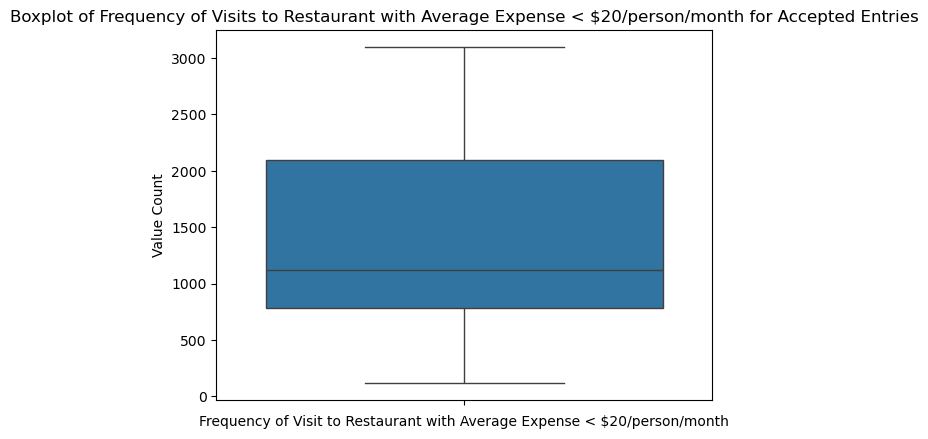

In [121]:
sns.boxplot(data = col_RestaurantLessThan20)
plt.xlabel("Frequency of Visit to Restaurant with Average Expense < $20/person/month")
plt.ylabel("Value Count")
plt.title("Boxplot of Frequency of Visits to Restaurant with Average Expense < $20/person/month for Accepted Entries")
plt.show()

In [122]:
# Moderately skewed

col_RestaurantLessThan20.skew()

0.5695140043904763

#### Feature "Restaurant20To50"

In [124]:
col_Restaurant20To50 = df_train[df_train["Accept(Y/N?)"] == 1]["Restaurant20To50"].value_counts()
col_Restaurant20To50

Restaurant20To50
less1    3495
1~3      1958
never    1105
4~8       477
gt8       175
Name: count, dtype: int64

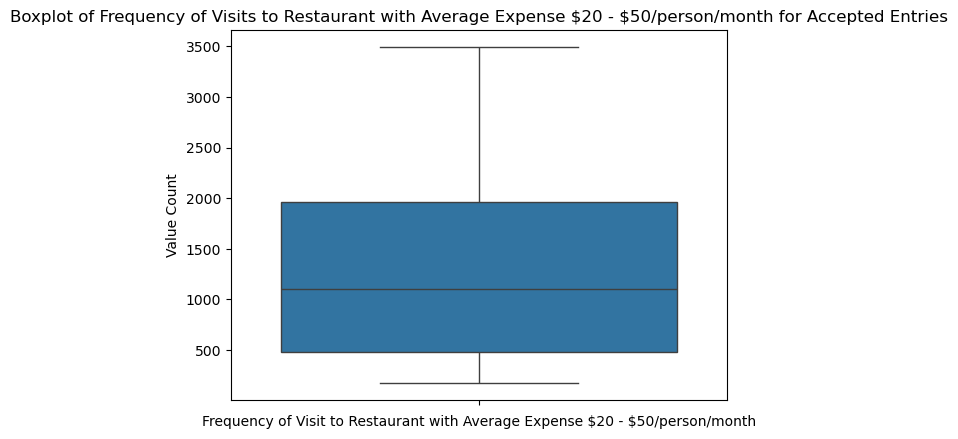

In [125]:
sns.boxplot(data = col_Restaurant20To50)
plt.xlabel("Frequency of Visit to Restaurant with Average Expense \$20 - $50/person/month")
plt.ylabel("Value Count")
plt.title("Boxplot of Frequency of Visits to Restaurant with Average Expense \$20 - $50/person/month for Accepted Entries")
plt.show()

In [126]:
# Highly skewed

col_Restaurant20To50.skew()

1.018665461013597

# Encoding
- We have nominal data ( no-order )
- We may use One-Hot Encoder

In [128]:
# Converting categorical data to numerical data

df_dummy = pd.get_dummies(df_train)
df_dummy.head()

temperature  age  has_children  toCoupon_GEQ15min  toCoupon_GEQ25min  \
0           55   21             1                  0                  0   
1           80   21             1                  0                  0   
2           80   21             1                  1                  0   
3           80   21             1                  1                  0   
4           80   21             1                  1                  0   

   direction_same  direction_opp  Accept(Y/N?)  destination_Home  \
0               0              1             1             False   
1               0              1             0             False   
2               0              1             1             False   
3               0              1             0             False   
4               0              1             0             False   

   destination_No Urgent Place  ...  RestaurantLessThan20_1~3  \
0                         True  ...                     False   
1                         True  ...                     False   
2                         True  ...                     False   
3                         True  ...                     False   
4                         True  ...                     False   

   RestaurantLessThan20_4~8  RestaurantLessThan20_gt8  \
0                      True                     False   
1                      True                     False   
2                      True                     False   
3                      True                     False   
4                      True                     False   

   RestaurantLessThan20_less1  RestaurantLessThan20_never  \
0                       False                       False   
1                       False                       False   
2                       False                       False   
3                       False                       False   
4                       False                       False   

   Restaurant20To50_1~3  Restaurant20To50_4~8  Restaurant20To50_gt8  \
0                  True                 False                 False   
1                  True                 False                 False   
2                  True                 False                 False   
3                  True                 False                 False   
4                  True                 False                 False   

   Restaurant20To50_less1  Restaurant20To50_never  
0                   False                   False  
1                   False                   False  
2                   False                   False  
3                   False                   False  
4                   False                   False  

[5 rows x 83 columns]

In [129]:
df_dummy.shape

(12684, 83)

### Correlation

In [131]:
df_dummy.corr().style.background_gradient()

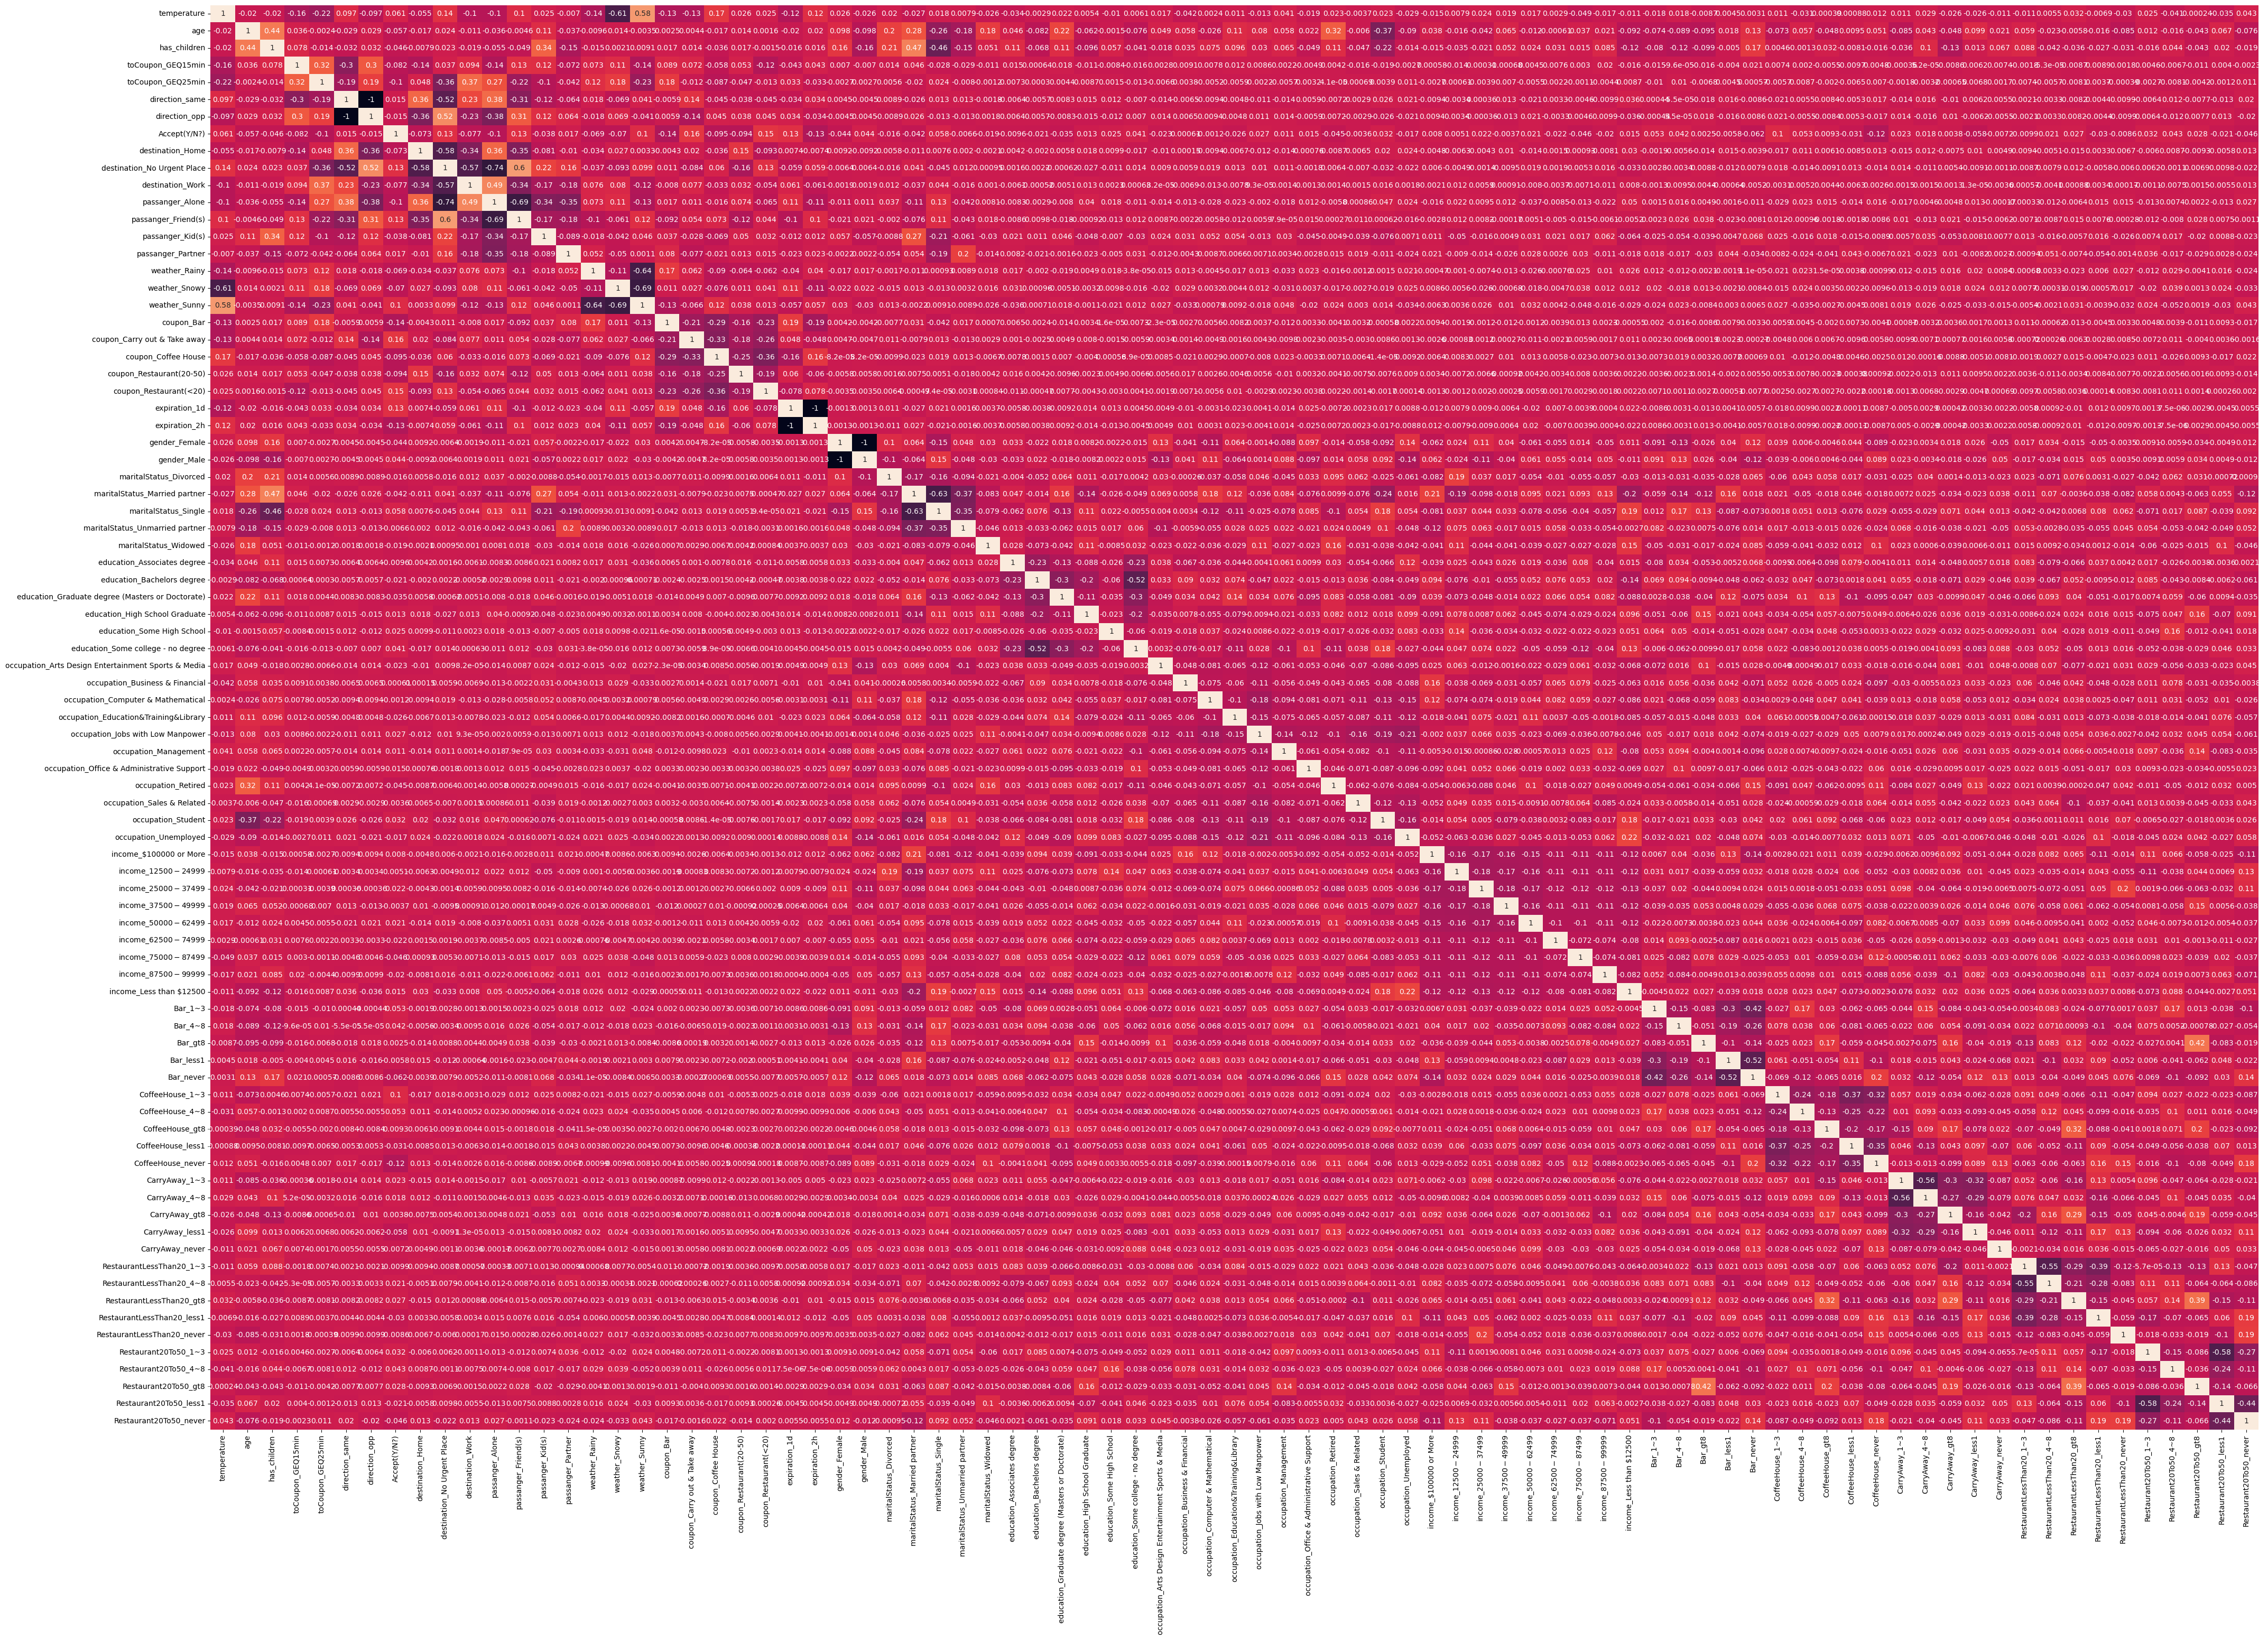

In [132]:
# cbar --> colour bar
# vmin, vmax --> minimum and maximum value allowed

plt.figure(figsize = (50,35))
sns.heatmap(df_dummy.corr(), annot = True, cbar = False, vmax = 1.0, vmin = -1.0)
sns.heatmap
plt.show()

In [133]:
# Redundant ( with strong correlation between themselves )

# direction_same OR direction_opp --> Different columns in the dataframe

# expiration_1d OR expiration_2h --> Same column, different values in the dataframe
# gender_Female OR gender_Male --> Same column, different values in the dataframe

In [134]:
# We notice that column "direction_same" and "direction_opp" are strongly correlated
# Therefore, we may drop the either of the two
# Dropping column "direction_opp"

df_dummy.drop(columns=["direction_opp"], inplace = True)
df_dummy.head()

temperature  age  has_children  toCoupon_GEQ15min  toCoupon_GEQ25min  \
0           55   21             1                  0                  0   
1           80   21             1                  0                  0   
2           80   21             1                  1                  0   
3           80   21             1                  1                  0   
4           80   21             1                  1                  0   

   direction_same  Accept(Y/N?)  destination_Home  \
0               0             1             False   
1               0             0             False   
2               0             1             False   
3               0             0             False   
4               0             0             False   

   destination_No Urgent Place  destination_Work  ...  \
0                         True             False  ...   
1                         True             False  ...   
2                         True             False  ...   
3                         True             False  ...   
4                         True             False  ...   

   RestaurantLessThan20_1~3  RestaurantLessThan20_4~8  \
0                     False                      True   
1                     False                      True   
2                     False                      True   
3                     False                      True   
4                     False                      True   

   RestaurantLessThan20_gt8  RestaurantLessThan20_less1  \
0                     False                       False   
1                     False                       False   
2                     False                       False   
3                     False                       False   
4                     False                       False   

   RestaurantLessThan20_never  Restaurant20To50_1~3  Restaurant20To50_4~8  \
0                       False                  True                 False   
1                       False                  True                 False   
2                       False                  True                 False   
3                       False                  True                 False   
4                       False                  True                 False   

   Restaurant20To50_gt8  Restaurant20To50_less1  Restaurant20To50_never  
0                 False                   False                   False  
1                 False                   False                   False  
2                 False                   False                   False  
3                 False                   False                   False  
4                 False                   False                   False  

[5 rows x 82 columns]

In [135]:
df_dummy.shape

(12684, 82)

# Check for Data Imbalance

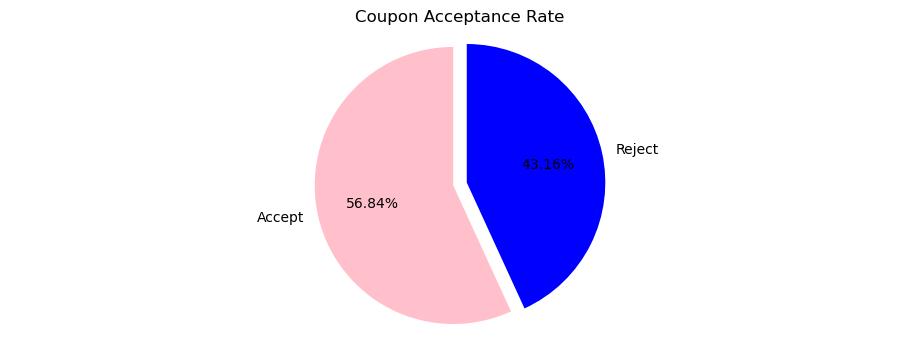

In [137]:
yesno_count = df_train["Accept(Y/N?)"].value_counts()

labels = ["Accept", "Reject"]
sizes = [yesno_count[1], yesno_count[0]]

plt.figure(figsize = (6, 4))
plt.pie(sizes, labels = labels, autopct = "%.2f%%", startangle = 90, colors = colors, explode = (0.1, 0))

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis("equal")

plt.subplots_adjust(left = -0.5, right = 1.0)
plt.title("Coupon Acceptance Rate")
plt.show()

In [138]:
df_train["Accept(Y/N?)"].value_counts()

Accept(Y/N?)
1    7210
0    5474
Name: count, dtype: int64

In [139]:
df_train["Accept(Y/N?)"].value_counts(normalize = True)

Accept(Y/N?)
1    0.568433
0    0.431567
Name: proportion, dtype: float64

In [140]:
# This case does not indicate a severe imbalance.
# There is no immediate need to use SMOTE or balance data.
# The data has relatively balanced proportions of acceptance and non-acceptance.

# Split and Scale the Data

### 1) Split

In [143]:
# Test variable --> x

x = df_dummy.drop(columns = "Accept(Y/N?)").copy()
x.head(2)

temperature  age  has_children  toCoupon_GEQ15min  toCoupon_GEQ25min  \
0           55   21             1                  0                  0   
1           80   21             1                  0                  0   

   direction_same  destination_Home  destination_No Urgent Place  \
0               0             False                         True   
1               0             False                         True   

   destination_Work  passanger_Alone  ...  RestaurantLessThan20_1~3  \
0             False             True  ...                     False   
1             False            False  ...                     False   

   RestaurantLessThan20_4~8  RestaurantLessThan20_gt8  \
0                      True                     False   
1                      True                     False   

   RestaurantLessThan20_less1  RestaurantLessThan20_never  \
0                       False                       False   
1                       False                       False   

   Restaurant20To50_1~3  Restaurant20To50_4~8  Restaurant20To50_gt8  \
0                  True                 False                 False   
1                  True                 False                 False   

   Restaurant20To50_less1  Restaurant20To50_never  
0                   False                   False  
1                   False                   False  

[2 rows x 81 columns]

In [144]:
# Target variable --> y

y = df_dummy["Accept(Y/N?)"]
y.head(2)

0    1
1    0
Name: Accept(Y/N?), dtype: int64

In [145]:
# stratify maintains balanced representation across different classes in both training and testing data.
# from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42, stratify = y)

### 2) Scale

In [147]:
# from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# First 2 rows
x_train_scaled[:2]

array([[-1.73907789, -1.19463009, -0.84003858,  0.87481979, -0.37071355,
         1.91842398, -0.58451977, -0.99420228,  1.74016832,  0.862595  ,
        -0.59332283, -0.29334916, -0.3087316 , -0.32437216,  2.83613681,
        -1.96460539, -0.43683255,  2.07533331, -0.67482813, -0.36570892,
        -0.53179561,  0.88646199, -0.88646199,  0.96541488, -0.96541488,
        -0.20546158, -0.82156877, -0.76710305,  2.16733962, -0.10323454,
        -0.31519826, -0.72121412, -0.41388796, -0.28088112, -0.08029404,
         1.38806982, -0.22980815, -0.2123977 , -0.34993678, -0.28291797,
        -0.51651864, -0.26268894, -0.22501467, -0.20572195, -0.30777321,
         2.64858602, -0.41714944,  2.54293521, -0.40436785, -0.43218471,
        -0.41372461, -0.38973082, -0.26927345, -0.27074399, -0.27903899,
        -0.29886168, -0.49207205, -0.29749004, -0.16907368,  1.6339526 ,
        -0.85704721,  1.72468541, -0.40634535, -0.31064258, -0.62907543,
        -0.55446786, -0.77751042, -0.72026704, -0.3

In [148]:
x_train_scaled.shape

(10147, 81)

In [149]:
x_test_scaled.shape

(2537, 81)

# Model Building

In [151]:
# You should check accuracy vs. cross-validation score to ensure consistency in performance.
# Comparing accuracy vs. ROC AUC score helps evaluate overall correctness versus discriminatory ability.
# Evaluating ROC AUC score vs. cross-validation score provides insights into generalization versus classification quality.

In [152]:
def model(classifier, x_train_scaled, y_train, x_test_scaled, y_test):
    
    classifier.fit(x_train_scaled, y_train)
    prediction = classifier.predict(x_test_scaled)
    
    cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 42)
   
    print("Cross Validation Score :", "{0:.2%}".format(cross_val_score
                                                       (classifier, x_train_scaled, y_train, cv = cv, scoring = "roc_auc").mean()))
    
    print("ROC_AUC_Score :", "{0:.2%}".format(roc_auc_score(y_test, prediction)))

In [153]:
def model_evaluation(classifier, x_test_scaled, y_test):
    
    cm = confusion_matrix(y_test, classifier.predict(x_test_scaled))
    names = ["True Negative", "False Positive", "False Negative", "True Positive"]
    
    counts = [i for i in cm.flatten()]
    percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(names, counts, percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    
    sns.heatmap(cm, annot = labels, cmap = "Blues", fmt = "")
    print(classification_report(y_test, classifier.predict(x_test_scaled)))
    print(accuracy_score(y_test, classifier.predict(x_test_scaled)))

### 1) Logistic Regression

In [155]:
# C: Inverse of regularization strength.
# solver: Algorithm to use in optimization problems (For eg, ‘lbfgs’, ‘liblinear’).
# max_iter: Maximum number of iterations taken for the solvers to converge.

classifier_logreg = LogisticRegression(C = 1.0, solver= "lbfgs", random_state = 42)

In [156]:
model(classifier_logreg, x_train_scaled, y_train, x_test_scaled, y_test)

Cross Validation Score : 73.53%
ROC_AUC_Score : 66.67%


              precision    recall  f1-score   support

           0       0.66      0.55      0.60      1095
           1       0.70      0.78      0.74      1442

    accuracy                           0.68      2537
   macro avg       0.68      0.67      0.67      2537
weighted avg       0.68      0.68      0.68      2537

0.6826960977532519


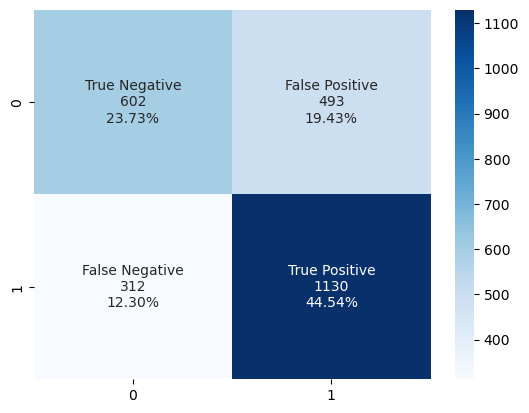

In [157]:
model_evaluation(classifier_logreg, x_test_scaled, y_test)

### 2) Decision Tree

In [159]:
# from sklearn.tree import DecisionTreeClassifier

classifier_dt = DecisionTreeClassifier(max_depth = 4, random_state = 42)

In [160]:
model(classifier_dt, x_train_scaled, y_train, x_test_scaled, y_test)

Cross Validation Score : 70.56%
ROC_AUC_Score : 66.25%


              precision    recall  f1-score   support

           0       0.65      0.56      0.60      1095
           1       0.70      0.77      0.73      1442

    accuracy                           0.68      2537
   macro avg       0.67      0.66      0.66      2537
weighted avg       0.67      0.68      0.67      2537

0.6771777690185258


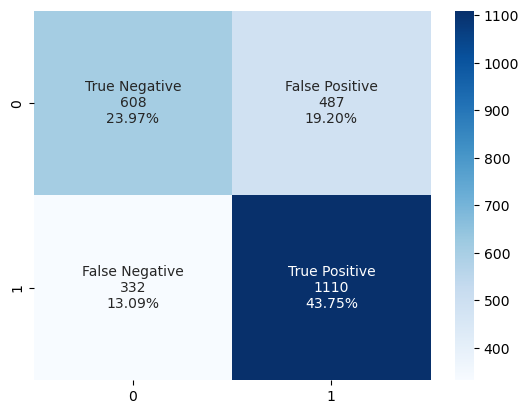

In [161]:
model_evaluation(classifier_dt, x_test_scaled, y_test)

### 3) Random Forest Classifier

In [163]:
# from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(n_estimators = 70, max_depth = 4, random_state = 42)

In [164]:
model(classifier_rf, x_train_scaled, y_train, x_test_scaled, y_test)

Cross Validation Score : 74.41%
ROC_AUC_Score : 65.45%


              precision    recall  f1-score   support

           0       0.78      0.40      0.52      1095
           1       0.67      0.91      0.77      1442

    accuracy                           0.69      2537
   macro avg       0.72      0.65      0.65      2537
weighted avg       0.71      0.69      0.66      2537

0.6897910918407568


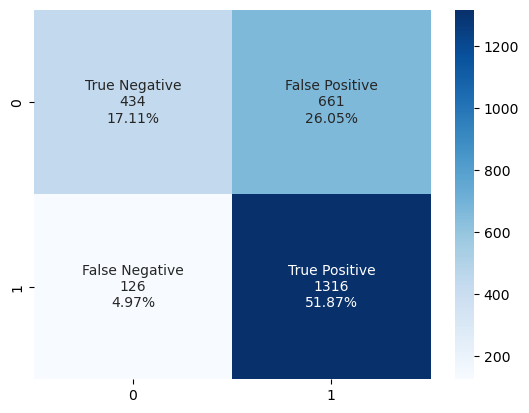

In [165]:
model_evaluation(classifier_rf, x_test_scaled, y_test)

### 4) XGBoost Classifier

In [167]:
# from xgboost import XGBClassifier

classifier_xgb = XGBClassifier(learning_rate = 0.01, max_depth = 4, n_estimators = 500)

In [168]:
model(classifier_xgb, x_train_scaled, y_train, x_test_scaled, y_test)

Cross Validation Score : 78.25%
ROC_AUC_Score : 70.97%


              precision    recall  f1-score   support

           0       0.72      0.59      0.65      1095
           1       0.73      0.83      0.77      1442

    accuracy                           0.73      2537
   macro avg       0.72      0.71      0.71      2537
weighted avg       0.73      0.73      0.72      2537

0.7256602286164762


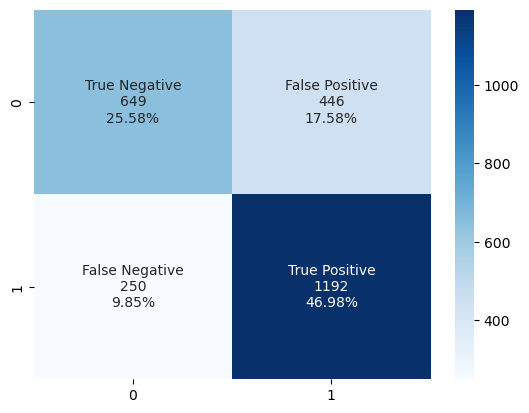

In [169]:
model_evaluation(classifier_xgb, x_test_scaled, y_test)

# Inferences
- Based on the Accuracy and Cross-Validation scores, XGBoost Model performs the best out of the trained models.

In [171]:
print("----------------------------------------------------------")
print("ACCURACY SCORE")
print("----------------------------------------------------------")
print("For Logistic Regression: {:.2f}%".format(accuracy_score(y_test, classifier_logreg.predict(x_test_scaled)) * 100))
print("----------------------------------------------------------")
print("For Decision Tree: {:.2f}%".format(accuracy_score(y_test, classifier_dt.predict(x_test_scaled)) * 100))
print("----------------------------------------------------------")
print("For Random Forest: {:.2f}%".format(accuracy_score(y_test, classifier_rf.predict(x_test_scaled)) * 100))
print("----------------------------------------------------------")
print("For XGBoost: {:.2f}%".format(accuracy_score(y_test, classifier_xgb.predict(x_test_scaled)) * 100))
print("----------------------------------------------------------")

----------------------------------------------------------
ACCURACY SCORE
----------------------------------------------------------
For Logistic Regression: 68.27%
----------------------------------------------------------
For Decision Tree: 67.72%
----------------------------------------------------------
For Random Forest: 68.98%
----------------------------------------------------------
For XGBoost: 72.57%
----------------------------------------------------------


# Hyperparamter Tuning
- We are tuning XGBoost Model as it ranked the highest in all the ML models.

### 1) Set up a parameter grid

In [174]:
param_dist = {"n_estimators": [200, 400, 600],
              "max_depth": [3, 5, 7],
              "learning_rate": [0.01, 0.1, 0.2],
              "subsample": [0.6, 0.8, 1.0],
              "colsample_bytree": [0.6, 0.8, 1.0]}

### 2) Set up randomized search with cross-validation

In [176]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor()

random_search = RandomizedSearchCV(estimator = xgb_model, param_distributions = param_dist, n_iter = 50,
                                   scoring = 'neg_mean_absolute_error', cv = 5, verbose = 1, random_state = 42, n_jobs = -1)

random_search.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [200, 400, 600],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='neg_mean_absolute_error',
                   verbose=1)

### 3) Evaluate the model

In [178]:
# Get best parameters from random search
best_params = random_search.best_params_
print("Best Parameters:", best_params)

# Predict using the best estimator found by RandomizedSearchCV
best_model = random_search.best_estimator_
y_pred = best_model.predict(x_test_scaled)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Best Parameters: {'subsample': 1.0, 'n_estimators': 600, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
Mean Absolute Error: 0.3264239056113976


### 4) Train the model with best parameters

In [180]:
# import xgboost as xgb
# from sklearn.metrics import accuracy_score

# Instantiate XGBClassifier with best parameters
tuned_model = xgb.XGBClassifier(**best_params)

# Fit the model on training data
tuned_model.fit(x_train_scaled, y_train)

# Make predictions on test data
y_pred = tuned_model.predict(x_test_scaled)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score for the Tuned Model: {:.2f}%".format(accuracy*100))

Accuracy Score for the Tuned Model: 75.64%


# Conclusion

In [182]:
print("----------------------------------------------------------")
print("THE ACCURACY")
print("----------------------------------------------------------")
print("For regular XGBoost Model: {:.2f}%".format(accuracy_score(y_test, classifier_xgb.predict(x_test_scaled)) * 100))
print("----------------------------------------------------------")
print("And for the Tuned Model: {:.2f}%".format(accuracy*100))
print("----------------------------------------------------------")

----------------------------------------------------------
THE ACCURACY
----------------------------------------------------------
For regular XGBoost Model: 72.57%
----------------------------------------------------------
And for the Tuned Model: 75.64%
----------------------------------------------------------
